<a href="https://colab.research.google.com/github/MizuIkuri/UniversityProject/blob/main/Cluster_Analysis_Based_on_Fruit_Production_with_K_Means%2C_Single_Linkage%2C_Hierarchical_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import Data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy
import scipy.cluster.hierarchy as shc
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples, silhouette_score
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from statsmodels.stats.outliers_influence import variance_inflation_factor as ViF
from sklearn.neighbors import NearestCentroid

In [ ]:
Produksi_Buah_2020_2022=pd.read_excel("Produksi Tanaman Buah-buahan 2020-2022 gabungan.xlsx")
Produksi_Buah_2020_2022=Produksi_Buah_2020_2022.set_index("Provinsi")

In [ ]:
Produksi_Buah_2020_2022.head()

Alpukat  Belimbing   Duku  Durian  Jambu Biji  Jambu Air  \
Provinsi                                                                   
ACEH             150887       4309  22393  130595       23115      14949   
SUMATERA UTARA   117901      19347  58761  313678       40725      48230   
SUMATERA BARAT   266593       2950  20591  521775       28045      29095   
RIAU               4579       6706  21868   75321       33291      28619   
JAMBI             33191       3579  50626   64455       11639      11071   

                Jeruk Siam  Jeruk Besar  Mangga   Manggis  ...   Sawo  \
Provinsi                                                   ...          
ACEH                 46396        30986   79170    8516.0  ...  13592   
SUMATERA UTARA     1183180         5245  127630   71314.0  ...  62409   
SUMATERA BARAT      381107         1684   49960  221084.0  ...  36591   
RIAU                254484         4780   53924   30975.0  ...  15694   
JAMBI               168150          868   18281   30624.0  ...  11771   

                Markisa  Sirsak  Sukun  Melon  Semangka  Blewah   Apel  \
Provinsi                                                                 
ACEH             1084.0    3505   5122   1084   21116.0     NaN  301.0   
SUMATERA UTARA    837.0    9001   6314   5126  112944.0     1.0    NaN   
SUMATERA BARAT  36500.0   27086   9692   5611   51088.0    20.0   47.0   
RIAU                6.0    4623   9492   3683   64243.0    58.0    NaN   
JAMBI              84.0    6031   8945   2709   16897.0    52.0    NaN   

                Anggur  Stroberi  
Provinsi                          
ACEH               NaN     143.0  
SUMATERA UTARA     6.0     254.0  
SUMATERA BARAT     4.0     438.0  
RIAU              59.0       NaN  
JAMBI             12.0      21.0  

[5 rows x 26 columns]

In [ ]:
Produksi_Buah_2020_2022.describe()

Alpukat      Belimbing           Duku         Durian  \
count      34.000000      34.000000      34.000000      34.000000   
mean    63061.588235   11194.205882   21918.029412  119659.000000   
std    117636.774955   35054.048100   27213.153865  194454.880051   
min       120.000000      47.000000      27.000000     650.000000   
25%      2824.250000    1142.750000    4376.750000   20012.500000   
50%     10819.000000    2211.500000   14785.000000   55420.500000   
75%     56122.500000    4250.500000   22849.750000  113428.250000   
max    517574.000000  200209.000000  138448.000000  971027.000000   

          Jambu Biji      Jambu Air    Jeruk Siam    Jeruk Besar  \
count      34.000000      34.000000  3.400000e+01      34.000000   
mean    37983.705882   18438.058824  2.219542e+05   11039.441176   
std     77259.897458   31456.862337  4.903489e+05   26544.667640   
min        66.000000      16.000000  6.490000e+02      45.000000   
25%      3964.500000    3117.250000  1.445975e+04     610.500000   
50%     11281.500000    5934.500000  5.845900e+04    1388.500000   
75%     31145.500000   18469.500000  1.712295e+05    4477.500000   
max    308606.000000  154531.000000  2.611658e+06  106417.000000   

             Mangga        Manggis  ...          Sawo       Markisa  \
count  3.400000e+01      33.000000  ...     34.000000     29.000000   
mean   2.659684e+05   29394.424242  ...  15407.500000   1838.620690   
std    7.499428e+05   52298.182488  ...  22026.930314   6887.045896   
min    5.918000e+03       9.000000  ...      1.000000      1.000000   
25%    1.842575e+04    2399.000000  ...    703.750000      8.000000   
50%    4.531900e+04    6371.000000  ...   5211.000000     70.000000   
75%    9.367225e+04   28751.000000  ...  15168.500000    329.000000   
max    4.079350e+06  221084.000000  ...  78460.000000  36500.000000   

             Sirsak          Sukun          Melon       Semangka  \
count     34.000000      34.000000      34.000000      33.000000   
mean   12622.235294   15528.176471   11353.441176   40678.151515   
std    23906.914817   25926.683755   34873.462228   71321.659603   
min      102.000000      19.000000      10.000000     394.000000   
25%     1256.250000    2347.000000     968.250000    4647.000000   
50%     3878.000000    5535.000000    1903.500000   16897.000000   
75%     8655.500000    9642.000000    4765.250000   47229.000000   
max    98601.000000  116228.000000  188639.000000  368149.000000   

             Blewah          Apel        Anggur     Stroberi  
count     22.000000  1.000000e+01     26.000000     20.00000  
mean    1502.636364  1.549668e+05   1445.769231   2355.30000  
std     4394.608109  4.895717e+05   6492.170449   8387.45517  
min        1.000000  3.000000e+00      1.000000      1.00000  
25%       10.250000  1.625000e+01      7.000000     23.75000  
50%       35.000000  5.750000e+01     27.500000    224.00000  
75%      168.750000  2.527500e+02    111.750000    452.50000  
max    19709.000000  1.548312e+06  33207.000000  37826.00000  

[8 rows x 26 columns]

In [ ]:
Produksi_Buah_2020_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, ACEH to PAPUA
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Alpukat      34 non-null     int64  
 1   Belimbing    34 non-null     int64  
 2   Duku         34 non-null     int64  
 3   Durian       34 non-null     int64  
 4   Jambu Biji   34 non-null     int64  
 5   Jambu Air    34 non-null     int64  
 6   Jeruk Siam   34 non-null     int64  
 7   Jeruk Besar  34 non-null     int64  
 8   Mangga       34 non-null     int64  
 9   Manggis      33 non-null     float64
 10  Nangka       34 non-null     int64  
 11  Nanas        33 non-null     float64
 12  Pepaya       34 non-null     int64  
 13  Pisang       34 non-null     int64  
 14  Rambutan     34 non-null     int64  
 15  Salak        34 non-null     int64  
 16  Sawo         34 non-null     int64  
 17  Markisa      29 non-null     float64
 18  Sirsak       34 non-null     int64  
 19  Sukun    

# 2.Explanatory Data Analysis (EDA)

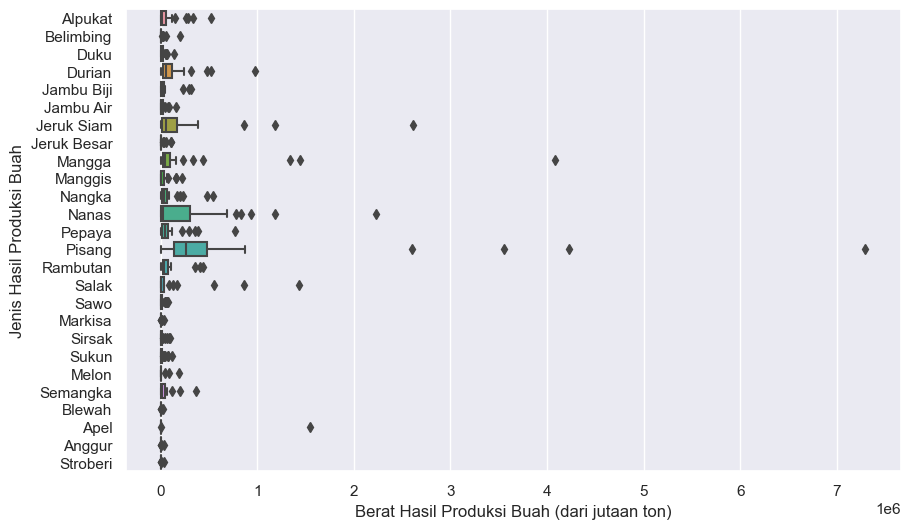

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
box2020_2022 = sns.boxplot(data=Produksi_Buah_2020_2022,orient="h")
plt.xlabel("Berat Hasil Produksi Buah (dari jutaan ton)")
plt.ylabel("Jenis Hasil Produksi Buah")
plt.show(box2020_2022)

##  2.1 Data Cleaning

In [ ]:
ProduksiBuah20_22=Produksi_Buah_2020_2022.drop(columns=['Markisa','Blewah'])
#kedua variabel tidak mempunyai produksi diantara 34 provinsi pada tahun 2021 sehingga variabel tidak digunakan.

In [ ]:
ProduksiBuah20_22= ProduksiBuah20_22.fillna(0)

In [ ]:
ProduksiBuah20_22

Alpukat  Belimbing    Duku  Durian  Jambu Biji  \
Provinsi                                                               
ACEH                   150887       4309   22393  130595       23115   
SUMATERA UTARA         117901      19347   58761  313678       40725   
SUMATERA BARAT         266593       2950   20591  521775       28045   
RIAU                     4579       6706   21868   75321       33291   
JAMBI                   33191       3579   50626   64455       11639   
SUMATERA SELATAN       105419       4068  138448  117258       18863   
BENGKULU                22152       1089    2473   55868        5075   
LAMPUNG                 63732      10199   29695   62604       47611   
KEP. BANGKA BELITUNG     4090        393    2103   12793        1745   
KEP. RIAU                 480        337     893   11568        1496   
DKI JAKARTA              3423       7676      34     650        4554   
JAWA BARAT             336037      25248   23002  240136      228644   
JAWA TENGAH            279669      57908   45767  479012      308606   
DI YOGYAKARTA           24737       2274    8730   24878       15835   
JAWA TIMUR             517574     200209   52445  971027      292169   
BANTEN                   5866       4548    9878   90105       17618   
BALI                    11263       1596    5465   74130       10924   
NUSA TENGGARA BARAT     33294       1996    2471  102770       44368   
NUSA TENGGARA TIMUR     70890       2149      27    9897       32179   
KALIMANTAN BARAT         4548       4075   20404   74767       13412   
KALIMANTAN TENGAH        1844       3274    4014   18952       10389   
KALIMANTAN SELATAN        120       2388   20608   54851        5685   
KALIMANTAN TIMUR         2460       3342   17592   32710        5834   
KALIMANTAN UTARA          261        661   13196   23194        1119   
SULAWESI UTARA          17925       1304   21625   38768        8585   
SULAWESI TENGAH         17891        763   15185  116981        2195   
SULAWESI SELATAN        24000       1523   67959  167739       36423   
SULAWESI TENGGARA        3275       1731   11905   48369        5650   
GORONTALO                 121         47    1026   14641          66   
SULAWESI BARAT           1148        294   23170   54973         936   
MALUKU                   4442       1551    8460   36085        3768   
MALUKU UTARA             2674        725    9582   15432        1684   
PAPUA BARAT             10375       1785   14385   10675       27576   
PAPUA                    1233        559     432    1749        1622   

                      Jambu Air  Jeruk Siam  Jeruk Besar   Mangga   Manggis  \
Provinsi                                                                      
ACEH                      14949       46396        30986    79170    8516.0   
SUMATERA UTARA            48230     1183180         5245   127630   71314.0   
SUMATERA BARAT            29095      381107         1684    49960  221084.0   
RIAU                      28619      254484         4780    53924   30975.0   
JAMBI                     11071      168150          868    18281   30624.0   
SUMATERA SELATAN          30010      172256         1184    52521    5916.0   
BENGKULU                   3337       69186         1370    22511   15944.0   
LAMPUNG                   31368      180335         3489    62078   28036.0   
KEP. BANGKA BELITUNG       4813        5472          279     5918    2399.0   
KEP. RIAU                  1037         698           69     6122     564.0   
DKI JAKARTA                6361         649           45    20108       0.0   
JAWA BARAT                78419      152813        23314  1337834  158602.0   
JAWA TENGAH              154531       84477        55588  1445394   28751.0   
DI YOGYAKARTA             11786        7639          534    90355    8044.0   
JAWA TIMUR                83538     2611658       106417  4079350  156703.0   
BANTEN                    19643        2411          515    94778   22488.0   
BALI   

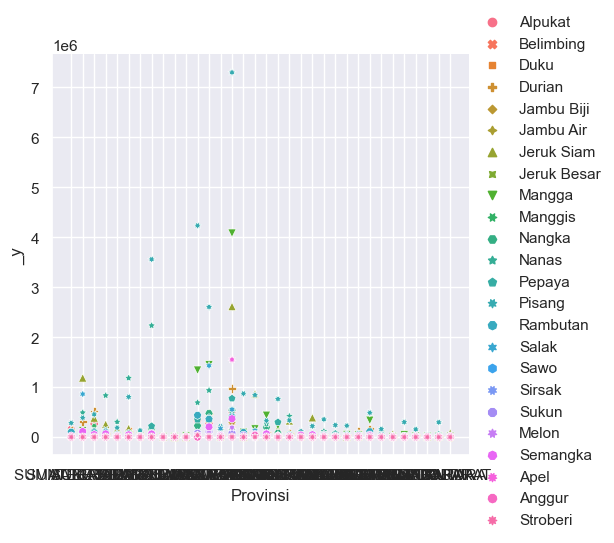

In [ ]:
sns.relplot(data=ProduksiBuah20_22)

<AxesSubplot:ylabel='Provinsi'>

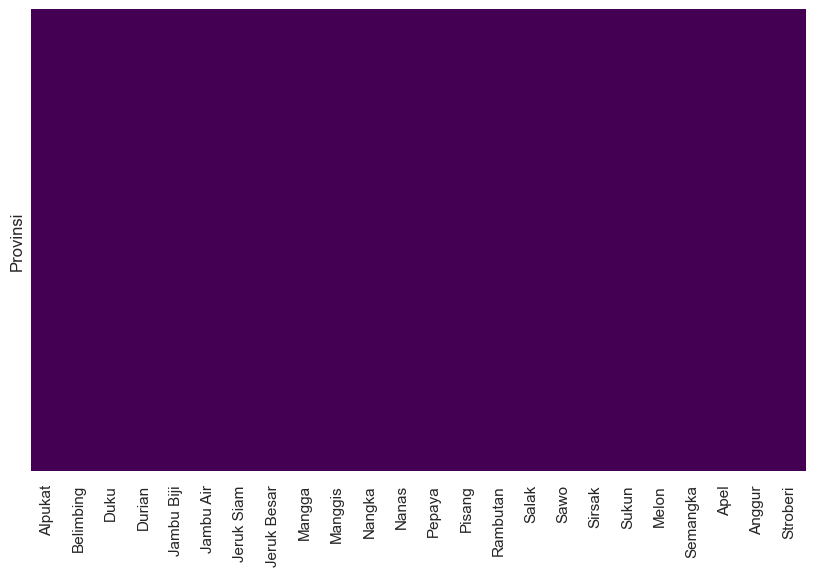

In [ ]:
sns.heatmap(ProduksiBuah20_22.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:>

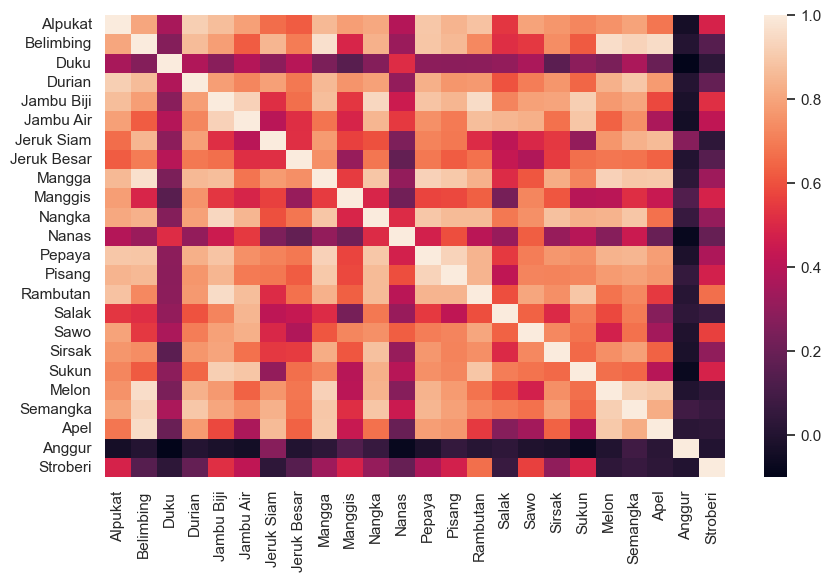

In [ ]:
sns.heatmap(ProduksiBuah20_22.corr())

## 2.2 Data Visualization

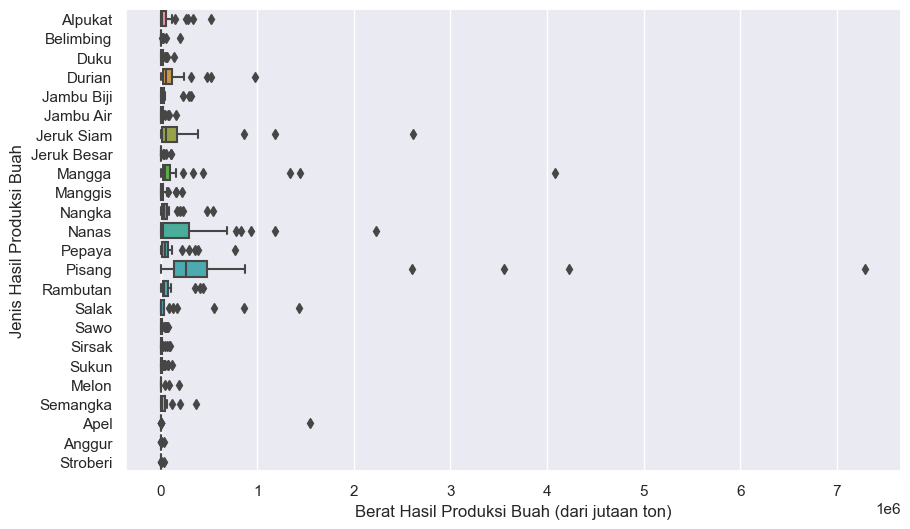

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
box20_22 = sns.boxplot(data=ProduksiBuah20_22,orient="h")
plt.xlabel("Berat Hasil Produksi Buah (dari jutaan ton)")
plt.ylabel("Jenis Hasil Produksi Buah")
plt.show(box20_22)

In [ ]:
ProduksiBuah20_22_copy = ProduksiBuah20_22.copy()

In [ ]:
pb = ProduksiBuah20_22.to_numpy()

## 2.3 Data Transformation

In [ ]:
scaler = MinMaxScaler()
#scaler = StandardScaler()

In [ ]:
ProduksiBuah20_22_scaled = scaler.fit_transform(ProduksiBuah20_22.to_numpy())
ProduksiBuah20_22_scaled = pd.DataFrame(ProduksiBuah20_22_scaled, columns=ProduksiBuah20_22.columns,index=ProduksiBuah20_22.index)

In [ ]:
print("Scaled Dataset Using MinMaxScaler")
ProduksiBuah20_22_scaled

Scaled Dataset Using MinMaxScaler


Alpukat  Belimbing      Duku    Durian  Jambu Biji  \
Provinsi                                                                    
ACEH                  0.291363   0.021293  0.161580  0.133912    0.074703   
SUMATERA UTARA        0.227616   0.096422  0.424314  0.322584    0.131779   
SUMATERA BARAT        0.514969   0.014503  0.148561  0.537034    0.090682   
RIAU                  0.008617   0.033268  0.157787  0.076951    0.107685   
JAMBI                 0.063911   0.017646  0.365544  0.065753    0.037509   
SUMATERA SELATAN      0.203494   0.020089  1.000000  0.120168    0.060922   
BENGKULU              0.042578   0.005206  0.017671  0.056904    0.016235   
LAMPUNG               0.122933   0.050719  0.214332  0.063845    0.154097   
KEP. BANGKA BELITUNG  0.007672   0.001729  0.014998  0.012514    0.005442   
KEP. RIAU             0.000696   0.001449  0.006256  0.011251    0.004635   
DKI JAKARTA           0.006383   0.038114  0.000051  0.000000    0.014546   
JAWA BARAT            0.649173   0.125903  0.165979  0.246797    0.740837   
JAWA TENGAH           0.540239   0.289071  0.330441  0.492965    1.000000   
DI YOGYAKARTA         0.047573   0.011126  0.062873  0.024968    0.051108   
JAWA TIMUR            1.000000   1.000000  0.378685  1.000000    0.946727   
BANTEN                0.011104   0.022487  0.071167  0.092186    0.056887   
BALI                  0.021534   0.007739  0.039286  0.075723    0.035192   
NUSA TENGGARA BARAT   0.064110   0.009737  0.017656  0.105237    0.143586   
NUSA TENGGARA TIMUR   0.136766   0.010501  0.000000  0.009529    0.104081   
KALIMANTAN BARAT      0.008557   0.020124  0.147210  0.076380    0.043255   
KALIMANTAN TENGAH     0.003332   0.016122  0.028803  0.018861    0.033458   
KALIMANTAN SELATAN    0.000000   0.011696  0.148684  0.055856    0.018212   
KALIMANTAN TIMUR      0.004522   0.016462  0.126895  0.033039    0.018694   
KALIMANTAN UTARA      0.000272   0.003068  0.095137  0.023232    0.003413   
SULAWESI UTARA        0.034409   0.006280  0.156031  0.039282    0.027611   
SULAWESI TENGAH       0.034343   0.003577  0.109507  0.119882    0.006900   
SULAWESI SELATAN      0.046149   0.007374  0.490764  0.172190    0.117836   
SULAWESI TENGGARA     0.006097   0.008413  0.085811  0.049176    0.018098   
GORONTALO             0.000002   0.000000  0.007217  0.014418    0.000000   
SULAWESI BARAT        0.001987   0.001234  0.167193  0.055981    0.002820   
MALUKU                0.008352   0.007514  0.060923  0.036517    0.011998   
MALUKU UTARA          0.004936   0.003387  0.069029  0.015233    0.005244   
PAPUA BARAT           0.019818   0.008683  0.103727  0.010331    0.089162   
PAPUA                 0.002151   0.002558  0.002926  0.001133    0.005043   

                      Jambu Air  Jeruk Siam  Jeruk Besar    Mangga   Manggis  \
Provinsi                                                                       
ACEH                   0.096644    0.017521     0.290875  0.017983  0.038519   
SUMATERA UTARA         0.312034    0.452902     0.048885  0.029879  0.322565   
SUMATERA BARAT         0.188195    0.145713     0.015408  0.010812  1.000000   
RIAU                   0.185115    0.097217     0.044514  0.011785  0.140105   
JAMBI                  0.071546    0.064152     0.007737  0.003035  0.138517   
SUMATERA SELATAN       0.194117    0.065724     0.010708  0.011441  0.026759   
BENGKULU               0.021493    0.026249     0.012456  0.004073  0.072117   
LAMPUNG                0.202906    0.068819     0.032377  0.013787  0.126812   
KEP. BANGKA BELITUNG   0.031046    0.001847     0.002200  0.000000  0.010851   
KEP. RIAU              0.006608    0.000019     0.000226  0.000050  0.002551   
DKI JAKARTA            0.041064    0.000000     0.000000  0.003484  0.000000   
JAWA BARAT             0.507414    0.058278     0.218751  0.326976  0.717383   
JAWA TENGAH            1.000000    0.032106     0.522158  0.353382  0.130046   
DI YOGYAKARTA          0.076174    0.002677     0.

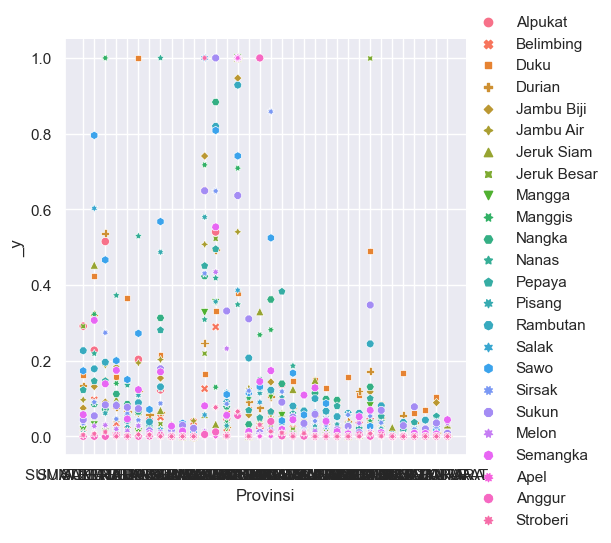

In [ ]:
sns.relplot(data=ProduksiBuah20_22_scaled)

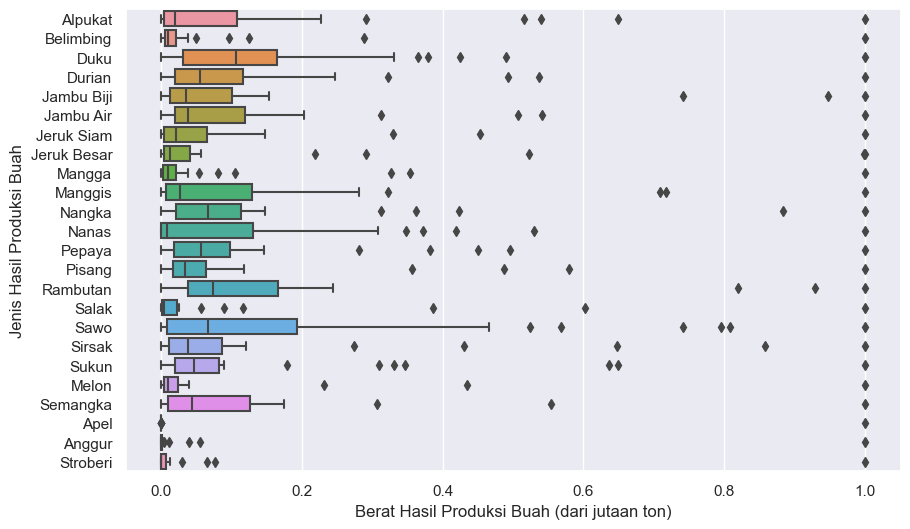

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
box20_22 = sns.boxplot(data=ProduksiBuah20_22_scaled,orient="h")
plt.xlabel("Berat Hasil Produksi Buah (dari jutaan ton)")
plt.ylabel("Jenis Hasil Produksi Buah")
plt.show(box20_22)

## 2.4 VIF

In [ ]:
def Calc_VIF(Data):
    #Calculating VIF
    VIF = pd.DataFrame()
    VIF['Variables'] = Data.columns
    VIF['VIF'] = [ViF(Data.values, i) for i in range(Data.shape[1])]
    return VIF

In [ ]:
Calc_VIF(ProduksiBuah20_22_scaled)

Variables          VIF
0       Alpukat   231.974512
1     Belimbing  1400.773457
2          Duku    13.171865
3        Durian   257.046865
4    Jambu Biji   359.296810
5     Jambu Air  1813.794145
6    Jeruk Siam   150.844569
7   Jeruk Besar   111.155240
8        Mangga  4794.463991
9       Manggis   106.549009
10       Nangka   186.399033
11        Nanas   155.402171
12       Pepaya    56.890755
13       Pisang   411.241944
14     Rambutan   309.253186
15        Salak   219.163682
16         Sawo   566.568867
17       Sirsak   442.691592
18        Sukun   342.950252
19        Melon   334.925102
20     Semangka   205.517478
21         Apel  2721.030432
22       Anggur    13.983284
23     Stroberi   428.268248

In [ ]:
ProduksiBuah20_22_scaled_cluster = ProduksiBuah20_22_scaled.copy()
psc = ProduksiBuah20_22_scaled.to_numpy()

# 3. PCA

In [ ]:
pca = PCA(n_components=3)

In [ ]:
principalComponents = pca.fit_transform(ProduksiBuah20_22_scaled_cluster)

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.65229876 0.086718   0.06117068]


In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'],index = ProduksiBuah20_22_scaled.index)
#,'principal component 4','principal component 5','principal component 6','principal component 7','principal component 8','principal component 9','principal component 10'

In [ ]:
principalDf

principal component 1  principal component 2  \
Provinsi                                                             
ACEH                              -0.092806               0.047337   
SUMATERA UTARA                     0.472903              -0.261143   
SUMATERA BARAT                     0.384959              -0.152729   
RIAU                              -0.083750              -0.117560   
JAMBI                             -0.239929              -0.039618   
SUMATERA SELATAN                   0.007483              -0.239554   
BENGKULU                          -0.411179               0.058462   
LAMPUNG                            0.349867              -0.437603   
KEP. BANGKA BELITUNG              -0.482492               0.072243   
KEP. RIAU                         -0.487729               0.066953   
DKI JAKARTA                       -0.489489               0.075747   
JAWA BARAT                         1.596476              -1.023694   
JAWA TENGAH                        2.174177              -0.537051   
DI YOGYAKARTA                     -0.193676               0.018822   
JAWA TIMUR                         3.453580               1.080844   
BANTEN                            -0.182623              -0.058624   
BALI                              -0.156027               0.187157   
NUSA TENGGARA BARAT                0.220100              -0.113325   
NUSA TENGGARA TIMUR               -0.192434               0.107810   
KALIMANTAN BARAT                  -0.261015              -0.015714   
KALIMANTAN TENGAH                 -0.390270               0.060895   
KALIMANTAN SELATAN                -0.319736               0.101512   
KALIMANTAN TIMUR                  -0.355860               0.032815   
KALIMANTAN UTARA                  -0.427224               0.083359   
SULAWESI UTARA                    -0.397065               0.071251   
SULAWESI TENGAH                   -0.409109               0.090917   
SULAWESI SELATAN                   0.106292               0.246762   
SULAWESI TENGGARA                 -0.393085               0.076199   
GORONTALO                         -0.513739               0.096608   
SULAWESI BARAT                    -0.450433               0.080170   
MALUKU                            -0.443985               0.086514   
MALUKU UTARA                      -0.479259               0.074951   
PAPUA BARAT                       -0.420570               0.067151   
PAPUA                             -0.492354               0.112136   

                      principal component 3  
Provinsi                                     
ACEH                               0.024086  
SUMATERA UTARA                    -0.021415  
SUMATERA BARAT                    -0.776127  
RIAU                               0.058292  
JAMBI                              0.026891  
SUMATERA SELATAN                   0.309540  
BENGKULU                          -0.062127  
LAMPUNG                            0.146488  
KEP. BANGKA BELITUNG              -0.000884  
KEP. RIAU                          0.001912  
DKI JAKARTA                        0.004065  
JAWA BARAT                        -0.552769  
JAWA TENGAH                        0.835334  
DI YOGYAKARTA                      0.118851  
JAWA TIMUR                        -0.173608  
BANTEN                             0.004994  
BALI                              -0.351779  
NUSA TENGGARA BARAT               -0.286556  
NUSA TENGGARA TIMUR               -0.000499  
KALIMANTAN BARAT                  -0.004639  
KALIMANTAN TENGAH                  0.019443  
KALIMANTAN SELATAN                 0.022756  
KALIMANTAN TIMUR                   0.048697  
KALIMANTAN UTARA                   0.032041  
SULAWESI UTARA                     0.027039  
SULAWESI TENGAH                    0.005913  
SULAWESI SELATAN                   0.437292  
SULAWESI TENGGARA                  0.025919  
GORONTALO                         -0.010166  
SULAWESI BARAT                     0.024656  
MALUKU                       

Text(0, 0.5, 'Second Principal Component')

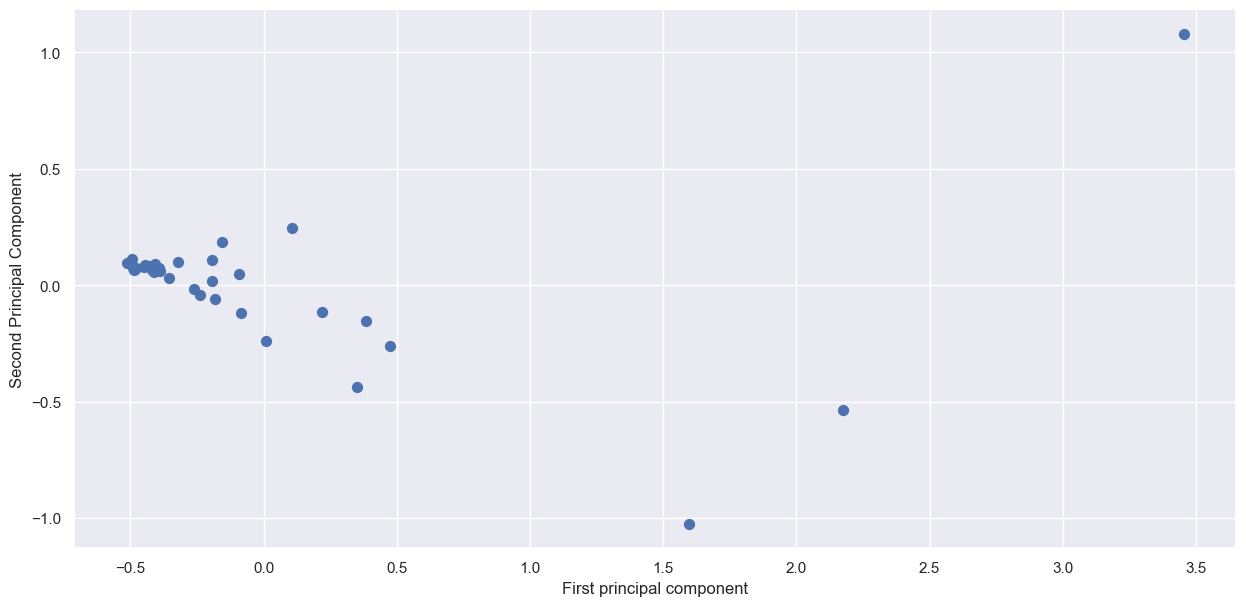

In [ ]:
plt.figure(figsize=(15,7))
plt.scatter(principalComponents[:,0],principalComponents[:,1],s = 50,cmap='rainbow')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [ ]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.65229876 0.086718   0.06117068]


In [ ]:
evc = pca.explained_variance_ratio_.cumsum()
evc

array([0.65229876, 0.73901675, 0.80018744])

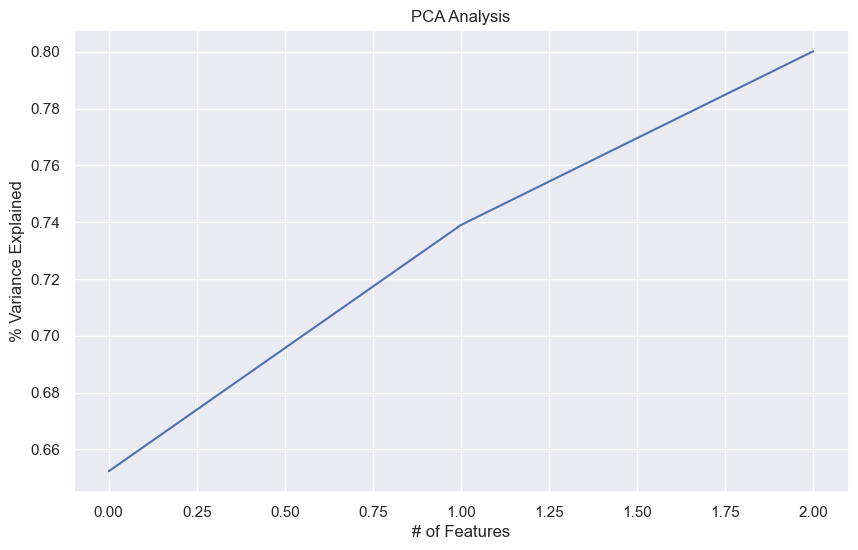

In [ ]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.style.context('seaborn-whitegrid')
#plt.axhline(y = 0.8, color = 'r', linestyle = '-')

plt.plot(evc)

In [ ]:
print(pca.singular_values_)

[4.82349523 1.75870583 1.47710115]


In [ ]:
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2','PC3'],index=['Alpukat (Ton)','Belimbing (Ton)','Duku (Ton)','Durian (Ton)','Jambu Biji (Ton)','Jambu Air (Ton)','Jeruk Siam (Ton)','Jeruk Besar (Ton)','Mangga (Ton)','Manggis (Ton)','Nangka (Ton)','Nenas (Ton)','Pepaya (Ton)','Pisang (Ton)','Rambutan (Ton)','Salak (Ton)','Sawo (Ton)','Sirsak (Ton)','Sukun (Ton)','Melon (Ton)','Semangka (Ton)','Apel (Ton)','Anggur (Ton)','Stroberi (Ton)'])
loadings
#,'PC4','PC5','PC6','PC7','PC8','PC9','PC10'

PC1       PC2       PC3
Alpukat (Ton)      0.252451 -0.022119 -0.181361
Belimbing (Ton)    0.183705  0.242558  0.001300
Duku (Ton)         0.086611 -0.070551  0.270380
Durian (Ton)       0.216049  0.135159 -0.109172
Jambu Biji (Ton)   0.284728 -0.118264  0.114043
Jambu Air (Ton)    0.211105 -0.228374  0.190181
Jeruk Siam (Ton)   0.157324  0.292070 -0.170702
Jeruk Besar (Ton)  0.213581  0.266015  0.256476
Mangga (Ton)       0.203846  0.181947 -0.030309
Manggis (Ton)      0.184538 -0.102790 -0.599328
Nangka (Ton)       0.256665  0.015693  0.125663
Nenas (Ton)        0.125161 -0.270899  0.192270
Pepaya (Ton)       0.221634  0.077304 -0.010064
Pisang (Ton)       0.222451  0.029697 -0.068860
Rambutan (Ton)     0.276040 -0.167025 -0.032217
Salak (Ton)        0.163654 -0.101400  0.330312
Sawo (Ton)         0.277351 -0.412929 -0.167949
Sirsak (Ton)       0.245180  0.038517 -0.120927
Sukun (Ton)        0.222552 -0.169971  0.253015
Melon (Ton)        0.186388  0.266910  0.087919
Semangka (Ton)     0.207232  0.174681  0.068631
Apel (Ton)         0.148446  0.349422 -0.079629
Anggur (Ton)       0.003172  0.074561 -0.167209
Stroberi (Ton)     0.085463 -0.320293 -0.237788

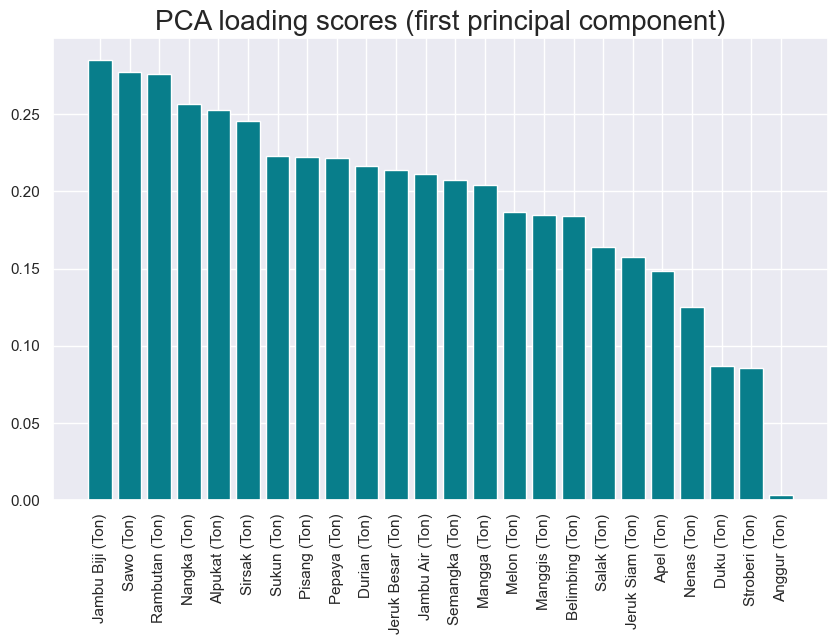

In [ ]:
pc1_loadings = loadings.sort_values(by='PC1', ascending=False)[['PC1']]
pc1_loadings = pc1_loadings.reset_index()
pc1_loadings.columns = ['Attribute', 'CorrelationWithPC1']

plt.bar(x=pc1_loadings['Attribute'], height=pc1_loadings['CorrelationWithPC1'], color='#087E8B')
plt.title('PCA loading scores (first principal component)', size=20)
plt.xticks(rotation='vertical')
plt.show()

# 4. K-Means

In [ ]:
wcss = []
for i in range (1,11):
    kmeans_pca = KMeans(i)
    kmeans_pca.fit(principalComponents)
    wcss.append(kmeans_pca.inertia_)

In [ ]:
wcss

[28.54098019819429,
 9.372392587904084,
 5.3572564298669425,
 3.2111782243268263,
 1.962483422058978,
 1.3226630825115648,
 0.9173946451958412,
 0.5985585401544481,
 0.45682420658711,
 0.3127598148093504]

In [ ]:
y=wcss
x=range(1, len(y)+1)
kn = KneeLocator(x, y, curve='convex', direction='decreasing')
print(kn.knee)

3


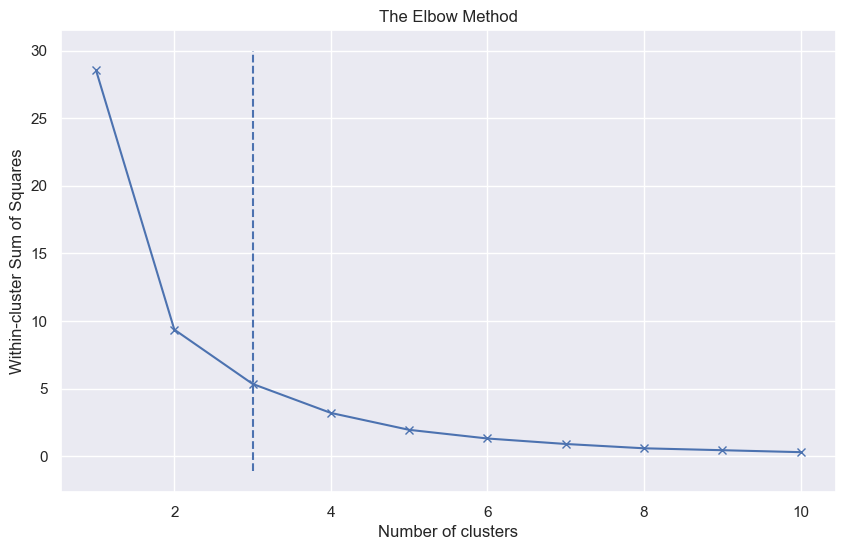

In [ ]:
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.plot(x, y, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')

##### k=3

In [ ]:
kmeans3_i = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300,random_state=42)
kmeans3_i.fit(principalDf)
identified_clusters_Kmeans3_i = kmeans3_i.fit_predict(principalDf)
identified_clusters_Kmeans3_i

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
kmeans3_i.feature_names_in_

array(['principal component 1', 'principal component 2',
       'principal component 3'], dtype=object)

In [ ]:
kmeans3_r = KMeans(n_clusters=3, init='random',n_init=10,max_iter=300,random_state=42)
kmeans3_r.fit(principalDf)
identified_clusters_Kmeans3_r = kmeans3_r.fit_predict(principalDf)
identified_clusters_Kmeans3_r

array([2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

##### k=4

In [ ]:
kmeans4 = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300,random_state=42)
kmeans4.fit(principalDf)
identified_clusters_Kmeans4 = kmeans4.fit_predict(principalDf)
identified_clusters_Kmeans4

array([0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
kmeans4_r = KMeans(n_clusters=4, init='random',n_init=10,max_iter=300,random_state=42)
kmeans4_r.fit(principalDf)
identified_clusters_Kmeans4_r = kmeans4_r.fit_predict(principalDf)
identified_clusters_Kmeans4_r

array([2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 1, 3, 2, 3, 2, 2, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

##### k=5

In [ ]:
kmeans5 = KMeans(n_clusters=5, init='k-means++',n_init=10,max_iter=300,random_state=42)
kmeans5.fit(principalDf)
identified_clusters_Kmeans5 = kmeans5.fit_predict(principalDf)
identified_clusters_Kmeans5

array([2, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 4, 1, 2, 3, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
kmeans5_r = KMeans(n_clusters=5, init='random',n_init=10,max_iter=300,random_state=42)
kmeans5_r.fit(principalDf)
identified_clusters_Kmeans5_r = kmeans5_r.fit_predict(principalDf)
identified_clusters_Kmeans5_r

array([2, 1, 1, 2, 2, 2, 0, 1, 0, 0, 0, 4, 4, 2, 3, 2, 2, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0])

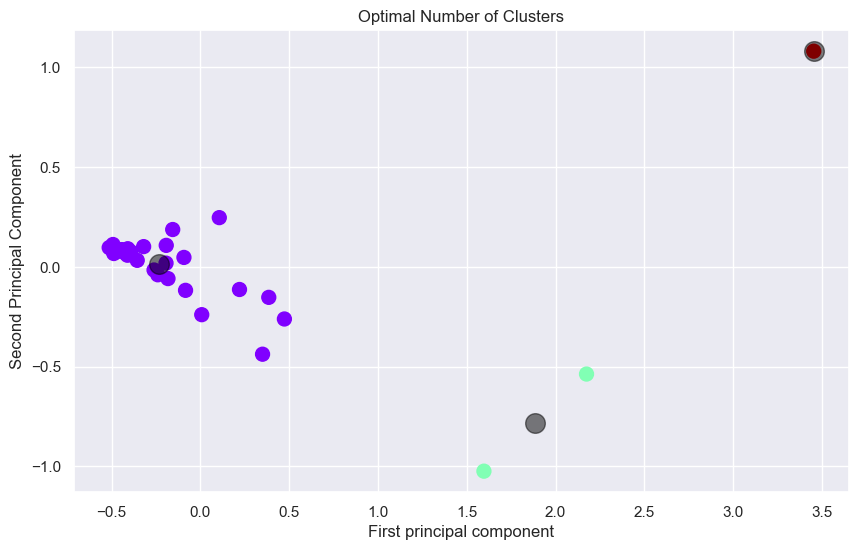

In [ ]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c= identified_clusters_Kmeans3_i, s=100, cmap='rainbow')
plt.title("Optimal Number of Clusters")

centers = kmeans3_i.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

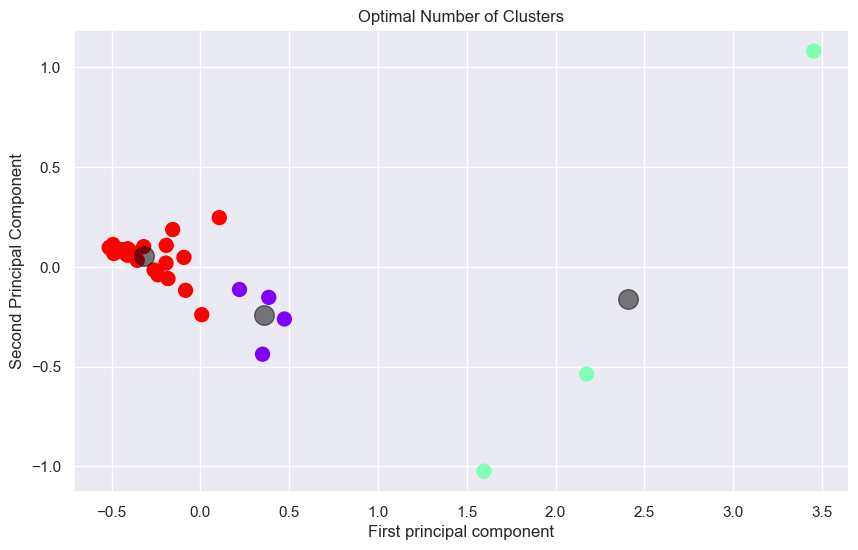

In [ ]:
plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c= identified_clusters_Kmeans3_r, s=100, cmap='rainbow')
plt.title("Optimal Number of Clusters")

centers = kmeans3_r.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

In [ ]:
Kmeans_Tabel = pd.DataFrame(data =identified_clusters_Kmeans3_i, columns=['k=3 kmeans++'], index = ProduksiBuah20_22_scaled_cluster.index)

In [ ]:
Kmeans_Tabel['k=4 kmeans++'] = identified_clusters_Kmeans4
Kmeans_Tabel['k=5 kmeans++'] = identified_clusters_Kmeans5
Kmeans_Tabel['k=3 random'] = identified_clusters_Kmeans3_r
Kmeans_Tabel['k=4 random'] = identified_clusters_Kmeans4_r
Kmeans_Tabel['k=5 random'] = identified_clusters_Kmeans5_r

In [ ]:
Kmeans_Tabel

k=3 kmeans++  k=4 kmeans++  k=5 kmeans++  k=3 random  \
Provinsi                                                                     
ACEH                             0             0             2           2   
SUMATERA UTARA                   0             3             0           0   
SUMATERA BARAT                   0             3             0           0   
RIAU                             0             0             2           2   
JAMBI                            0             0             2           2   
SUMATERA SELATAN                 0             0             2           2   
BENGKULU                         0             0             2           2   
LAMPUNG                          0             3             0           0   
KEP. BANGKA BELITUNG             0             0             2           2   
KEP. RIAU                        0             0             2           2   
DKI JAKARTA                      0             0             2           2   
JAWA BARAT                       1             1             4           1   
JAWA TENGAH                      1             1             1           1   
DI YOGYAKARTA                    0             0             2           2   
JAWA TIMUR                       2             2             3           1   
BANTEN                           0             0             2           2   
BALI                             0             0             2           2   
NUSA TENGGARA BARAT              0             3             0           0   
NUSA TENGGARA TIMUR              0             0             2           2   
KALIMANTAN BARAT                 0             0             2           2   
KALIMANTAN TENGAH                0             0             2           2   
KALIMANTAN SELATAN               0             0             2           2   
KALIMANTAN TIMUR                 0             0             2           2   
KALIMANTAN UTARA                 0             0             2           2   
SULAWESI UTARA                   0             0             2           2   
SULAWESI TENGAH                  0             0             2           2   
SULAWESI SELATAN                 0             0             2           2   
SULAWESI TENGGARA                0             0             2           2   
GORONTALO                        0             0             2           2   
SULAWESI BARAT                   0             0             2           2   
MALUKU                           0             0             2           2   
MALUKU UTARA                     0             0             2           2   
PAPUA BARAT                      0             0             2           2   
PAPUA                            0             0             2           2   

                      k=4 random  k=5 random  
Provinsi                                      
ACEH                           2           2  
SUMATERA UTARA                 1           1  
SUMATERA BARAT                 1           1  
RIAU                           2           2  
JAMBI                          2           2  
SUMATERA SELATAN               2           2  
BENGKULU                       0           0  
LAMPUNG                        1           1  
KEP. BANGKA BELITUNG           0           0  
KEP. RIAU                      0           0  
DKI JAKARTA                    0           0  
JAWA BARAT                     1           4  
JAWA TENGAH                    3           4  
DI YOGYAKARTA                  2           2  
JAWA TIMUR                     3           3  
BANTEN                         2           2  
BALI                           2           2  
NUSA TENGGARA BARAT            1           1  
NUSA TENGGARA TIMUR            2           2  
KALIMANTAN BARAT               2           2  
KALIMANTAN TENGAH              0           0  
KALIMANTAN SELATAN             0           0  
KALIMANTAN TIMUR               0           0  
KALIMANTAN UTARA               0      

# 5. Single Linkage

In [ ]:
cluster3 = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
cluster3 =cluster3.fit_predict(principalComponents)
cluster3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
cluster4 =cluster4.fit_predict(principalComponents)
cluster4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [ ]:
cluster5 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
cluster5 =cluster5.fit_predict(principalComponents)
cluster5

array([0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

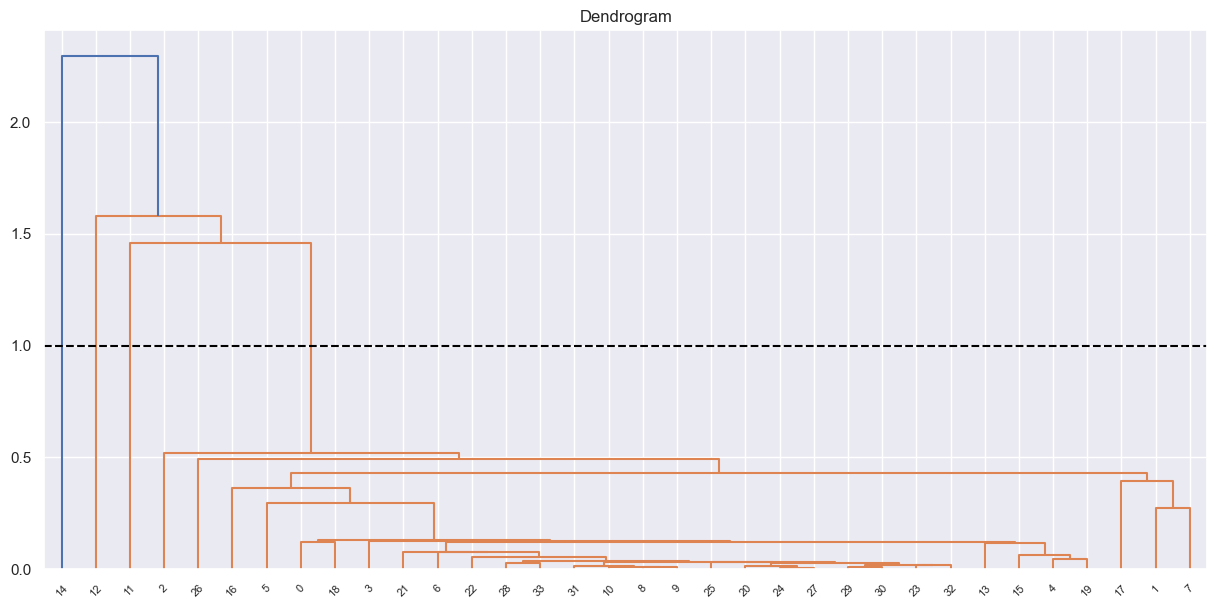

In [ ]:
plt.figure(figsize=(15, 7))
plt.title("Dendrogram")
dend = dendrogram(hierarchy.linkage(principalComponents, method='single'))
plt.axhline(y=1, color='black', linestyle='--')
plt.show()

In [ ]:
SingleLinkage_Tabel = pd.DataFrame(data =cluster3, columns=['k=3'], index = ProduksiBuah20_22_scaled_cluster.index)

In [ ]:
SingleLinkage_Tabel['k=4'] = cluster4
SingleLinkage_Tabel['k=5'] = cluster5

In [ ]:
SingleLinkage_Tabel

k=3  k=4  k=5
Provinsi                           
ACEH                    0    0    0
SUMATERA UTARA          0    0    0
SUMATERA BARAT          0    0    4
RIAU                    0    0    0
JAMBI                   0    0    0
SUMATERA SELATAN        0    0    0
BENGKULU                0    0    0
LAMPUNG                 0    0    0
KEP. BANGKA BELITUNG    0    0    0
KEP. RIAU               0    0    0
DKI JAKARTA             0    0    0
JAWA BARAT              0    3    3
JAWA TENGAH             2    2    2
DI YOGYAKARTA           0    0    0
JAWA TIMUR              1    1    1
BANTEN                  0    0    0
BALI                    0    0    0
NUSA TENGGARA BARAT     0    0    0
NUSA TENGGARA TIMUR     0    0    0
KALIMANTAN BARAT        0    0    0
KALIMANTAN TENGAH       0    0    0
KALIMANTAN SELATAN      0    0    0
KALIMANTAN TIMUR        0    0    0
KALIMANTAN UTARA        0    0    0
SULAWESI UTARA          0    0    0
SULAWESI TENGAH         0    0    0
SULAWESI SELATAN        0    0    0
SULAWESI TENGGARA       0    0    0
GORONTALO               0    0    0
SULAWESI BARAT          0    0    0
MALUKU                  0    0    0
MALUKU UTARA            0    0    0
PAPUA BARAT             0    0    0
PAPUA                   0    0    0

## Combination K-Means & Single Linkage

In [ ]:
clf3 = NearestCentroid()
clf3.fit(principalComponents, cluster3 )
slc3=clf3.centroids_
print(slc3)

[[-0.17586741 -0.01699351 -0.02067896]
 [ 3.45358047  1.08084392 -0.17360785]
 [ 2.17417666 -0.5370515   0.83533448]]


In [ ]:
clf4 = NearestCentroid()
clf4.fit(principalComponents, cluster4 )
slc4=clf4.centroids_
print(slc4)

[[-0.23303979  0.0154807  -0.00351477]
 [ 3.45358047  1.08084392 -0.17360785]
 [ 2.17417666 -0.5370515   0.83533448]
 [ 1.59647623 -1.02369398 -0.55276887]]


In [ ]:
clf5 = NearestCentroid()
clf5.fit(principalComponents, cluster5 )
slc5=clf5.centroids_
print(slc5)

[[-0.25363976  0.02108769  0.02223899]
 [ 3.45358047  1.08084392 -0.17360785]
 [ 2.17417666 -0.5370515   0.83533448]
 [ 1.59647623 -1.02369398 -0.55276887]
 [ 0.38495947 -0.15272904 -0.77612743]]


In [ ]:
slc3_ = np.array(slc3)
slc4_ = np.array(slc4)
slc5_ = np.array(slc5)

In [ ]:
hkmeans3 = KMeans(n_clusters=3, init=slc3_,n_init=10,max_iter=300,random_state=42)
hkmeans3.fit(principalComponents)
identified_clusters_hKmeans3 = hkmeans3.fit_predict(principalComponents)
identified_clusters_hKmeans3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
hkmeans4 = KMeans(n_clusters=4, init=slc4_,n_init=10,max_iter=300,random_state=42)
hkmeans4.fit(principalComponents)
identified_clusters_hKmeans4 = hkmeans4.fit_predict(principalComponents)
identified_clusters_hKmeans4

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
hkmeans5 = KMeans(n_clusters=5, init=slc5_,n_init=10,max_iter=300,random_state=42)
hkmeans5.fit(principalComponents)
identified_clusters_hKmeans5 = hkmeans5.fit_predict(principalComponents)
identified_clusters_hKmeans5

array([0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 0, 3, 2, 0, 1, 0, 0, 4, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
Hierarchical_Kmeans_Tabel = pd.DataFrame(data =identified_clusters_hKmeans3, columns=['k=3 hk'], index = ProduksiBuah20_22_scaled_cluster.index)

In [ ]:
Hierarchical_Kmeans_Tabel['k=4 hk'] = identified_clusters_hKmeans4
Hierarchical_Kmeans_Tabel['k=5 hk'] = identified_clusters_hKmeans5

In [ ]:
Hierarchical_Kmeans_Tabel

k=3 hk  k=4 hk  k=5 hk
Provinsi                                    
ACEH                       0       0       0
SUMATERA UTARA             0       0       4
SUMATERA BARAT             0       0       4
RIAU                       0       0       0
JAMBI                      0       0       0
SUMATERA SELATAN           0       0       0
BENGKULU                   0       0       0
LAMPUNG                    0       0       4
KEP. BANGKA BELITUNG       0       0       0
KEP. RIAU                  0       0       0
DKI JAKARTA                0       0       0
JAWA BARAT                 2       3       3
JAWA TENGAH                2       2       2
DI YOGYAKARTA              0       0       0
JAWA TIMUR                 1       1       1
BANTEN                     0       0       0
BALI                       0       0       0
NUSA TENGGARA BARAT        0       0       4
NUSA TENGGARA TIMUR        0       0       0
KALIMANTAN BARAT           0       0       0
KALIMANTAN TENGAH          0       0       0
KALIMANTAN SELATAN         0       0       0
KALIMANTAN TIMUR           0       0       0
KALIMANTAN UTARA           0       0       0
SULAWESI UTARA             0       0       0
SULAWESI TENGAH            0       0       0
SULAWESI SELATAN           0       0       0
SULAWESI TENGGARA          0       0       0
GORONTALO                  0       0       0
SULAWESI BARAT             0       0       0
MALUKU                     0       0       0
MALUKU UTARA               0       0       0
PAPUA BARAT                0       0       0
PAPUA                      0       0       0

In [ ]:
ProduksiBuah20_22_copy = pd.concat([ProduksiBuah20_22_copy, Kmeans_Tabel,SingleLinkage_Tabel,Hierarchical_Kmeans_Tabel ], axis=1)
ProduksiBuah20_22_scaled_cluster = pd.concat([ProduksiBuah20_22_scaled_cluster, Kmeans_Tabel,SingleLinkage_Tabel,Hierarchical_Kmeans_Tabel  ], axis=1)

In [ ]:
kmeans3 = KMeans(n_clusters=3, init='k-means++',n_init=10,max_iter=300,random_state=42)
kmeans3.fit(ProduksiBuah20_22_scaled)
kmeans4 = KMeans(n_clusters=4, init='k-means++',n_init=10,max_iter=300,random_state=42)
kmeans4.fit(ProduksiBuah20_22_scaled)
kmeans5 = KMeans(n_clusters=5, init='k-means++',n_init=10,max_iter=300,random_state=42)
kmeans5.fit(ProduksiBuah20_22_scaled)

KMeans(n_clusters=5, random_state=42)

# 6. Evaluasi cluster

## 6.1 Calinski Harabasz Index

In [ ]:
resultsk = {}

for i in range(3,6):
    kmeansk = KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300,random_state=42)
    labelsk = kmeansk.fit_predict(principalComponents)
    db_indexk = calinski_harabasz_score(psc, labelsk)
    resultsk.update({i: db_indexk})

resultsr = {}

for i in range(3,6):
    kmeansr = KMeans(n_clusters=i, init='random',n_init=10,max_iter=300,random_state=42)
    labelsr = kmeansr.fit_predict(principalComponents)
    db_indexr = calinski_harabasz_score(psc, labelsr)
    resultsr.update({i: db_indexr})

resultshk = {}

for i in range(1,2):
    kmeanshk3_ = KMeans(n_clusters=3, init=slc3_,n_init=10,max_iter=300,random_state=42)
    labelshk3_ = kmeanshk3_.fit_predict(principalComponents)
    db_indexhk3_ = calinski_harabasz_score(psc, labelshk3_)
    resultshk.update({3: db_indexhk3_})
    kmeanshk4_ = KMeans(n_clusters=4, init=slc4_,n_init=10,max_iter=300,random_state=42)
    labelshk4_ = kmeanshk4_.fit_predict(principalComponents)
    db_indexhk4_ = calinski_harabasz_score(psc, labelshk4_)
    resultshk.update({4: db_indexhk4_})
    kmeanshk5_ = KMeans(n_clusters=5, init=slc5_,n_init=10,max_iter=300,random_state=42)
    labelshk5_ = kmeanshk5_.fit_predict(principalComponents)
    db_indexhk5_ = calinski_harabasz_score(psc, labelshk5_)
    resultshk.update({5: db_indexhk5_})

resultssl = {}

for i in range(3,6):
    sl = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    labelssl = sl.fit_predict(principalComponents)
    db_indexsl = calinski_harabasz_score(psc, labelssl)
    resultssl.update({i: db_indexsl})

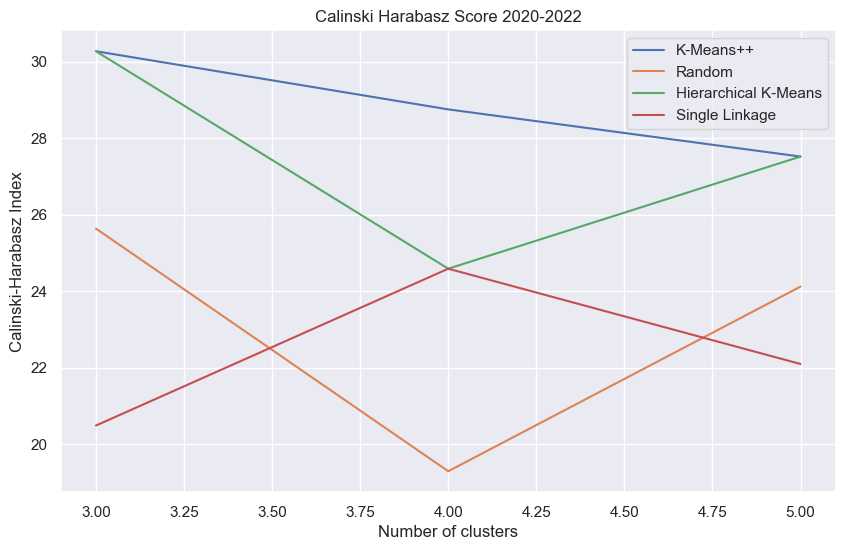

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
plt.plot(list(resultsk.keys()), list(resultsk.values()), label='K-Means++')
plt.plot(list(resultsr.keys()), list(resultsr.values()), label='Random')
plt.plot(list(resultshk.keys()), list(resultshk.values()), label='Hierarchical K-Means')
plt.plot(list(resultssl.keys()), list(resultssl.values()), label='Single Linkage')
plt.title('Calinski Harabasz Score 2020-2022')
plt.xlabel("Number of clusters")
plt.ylabel("Calinski-Harabasz Index")
plt.legend()
plt.show()

In [ ]:
ch_index_kmeans3_i = calinski_harabasz_score(psc, Kmeans_Tabel['k=3 kmeans++'])
ch_index_kmeans4_i = calinski_harabasz_score(psc, Kmeans_Tabel['k=4 kmeans++'])
ch_index_kmeans5_i = calinski_harabasz_score(psc, Kmeans_Tabel['k=5 kmeans++'])
ch_index_kmeans3_r = calinski_harabasz_score(psc, Kmeans_Tabel['k=3 random'])
ch_index_kmeans4_r = calinski_harabasz_score(psc, Kmeans_Tabel['k=4 random'])
ch_index_kmeans5_r = calinski_harabasz_score(psc, Kmeans_Tabel['k=5 random'])
ch_index_hkmeans3 = calinski_harabasz_score(psc, Hierarchical_Kmeans_Tabel['k=3 hk'])
ch_index_hkmeans4 = calinski_harabasz_score(psc, Hierarchical_Kmeans_Tabel['k=4 hk'])
ch_index_hkmeans5 = calinski_harabasz_score(psc, Hierarchical_Kmeans_Tabel['k=5 hk'])

In [ ]:
print('Calinski Harabasz Index K-means 3 kmeans++:',ch_index_kmeans3_i)
print('Calinski Harabasz Index K-means 4 kmeans++:',ch_index_kmeans4_i)
print('Calinski Harabasz Index K-means 5 kmeans++:',ch_index_kmeans5_i)
print('Calinski Harabasz Index K-means 3 random:',ch_index_kmeans3_r)
print('Calinski Harabasz Index K-means 3 random:',ch_index_kmeans4_r)
print('Calinski Harabasz Index K-means 3 random:',ch_index_kmeans5_r)
print('Calinski Harabasz Index HK-means 3:',ch_index_hkmeans3)
print('Calinski Harabasz Index HK-means 4:',ch_index_hkmeans4)
print('Calinski Harabasz Index HK-means 5:',ch_index_hkmeans5)

Calinski Harabasz Index K-means 3 kmeans++: 30.27567892886422
Calinski Harabasz Index K-means 4 kmeans++: 28.756485814113994
Calinski Harabasz Index K-means 5 kmeans++: 27.523183992221334
Calinski Harabasz Index K-means 3 random: 25.64022381449592
Calinski Harabasz Index K-means 3 random: 19.29857643823079
Calinski Harabasz Index K-means 3 random: 24.12419255437759
Calinski Harabasz Index HK-means 3: 30.27567892886422
Calinski Harabasz Index HK-means 4: 24.59244988312941
Calinski Harabasz Index HK-means 5: 27.523183992221334


In [ ]:
ch_index_SingleLinkage3 = calinski_harabasz_score(psc, cluster3 )
ch_index_SingleLinkage4 = calinski_harabasz_score(psc, cluster4 )
ch_index_SingleLinkage5 = calinski_harabasz_score(psc, cluster5 )

In [ ]:
print('Calinski Harabasz Index Single Linkage 3:',ch_index_SingleLinkage3)
print('Calinski Harabasz Index Single Linkage 4:',ch_index_SingleLinkage4)
print('Calinski Harabasz Index Single Linkage 5:',ch_index_SingleLinkage5)

Calinski Harabasz Index Single Linkage 3: 20.493703416896846
Calinski Harabasz Index Single Linkage 4: 24.59244988312941
Calinski Harabasz Index Single Linkage 5: 22.101845709584115


## 6.2 Silhouette coefficient

In [ ]:
resultsk = {}

for i in range(3,6):
    kmeansk = KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300,random_state=42)
    labelsk = kmeansk.fit_predict(principalComponents)
    db_indexk = silhouette_score(psc, labelsk)
    resultsk.update({i: db_indexk})

resultsr = {}

for i in range(3,6):
    kmeansr = KMeans(n_clusters=i, init='random',n_init=10,max_iter=300,random_state=42)
    labelsr = kmeansr.fit_predict(principalComponents)
    db_indexr = silhouette_score(psc, labelsr)
    resultsr.update({i: db_indexr})

resultshk = {}

for i in range(1,2):
    kmeanshk3_ = KMeans(n_clusters=3, init=slc3_,n_init=10,max_iter=300,random_state=42)
    labelshk3_ = kmeanshk3_.fit_predict(principalComponents)
    db_indexhk3_ = silhouette_score(psc, labelshk3_)
    resultshk.update({3: db_indexhk3_})
    kmeanshk4_ = KMeans(n_clusters=4, init=slc4_,n_init=10,max_iter=300,random_state=42)
    labelshk4_ = kmeanshk4_.fit_predict(principalComponents)
    db_indexhk4_ = silhouette_score(psc, labelshk4_)
    resultshk.update({4: db_indexhk4_})
    kmeanshk5_ = KMeans(n_clusters=5, init=slc5_,n_init=10,max_iter=300,random_state=42)
    labelshk5_ = kmeanshk5_.fit_predict(principalComponents)
    db_indexhk5_ = silhouette_score(psc, labelshk5_)
    resultshk.update({5: db_indexhk5_})

resultssl = {}

for i in range(3,6):
    sl = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage='single')
    labelssl = sl.fit_predict(principalComponents)
    db_indexsl = silhouette_score(psc, labelssl)
    resultssl.update({i: db_indexsl})

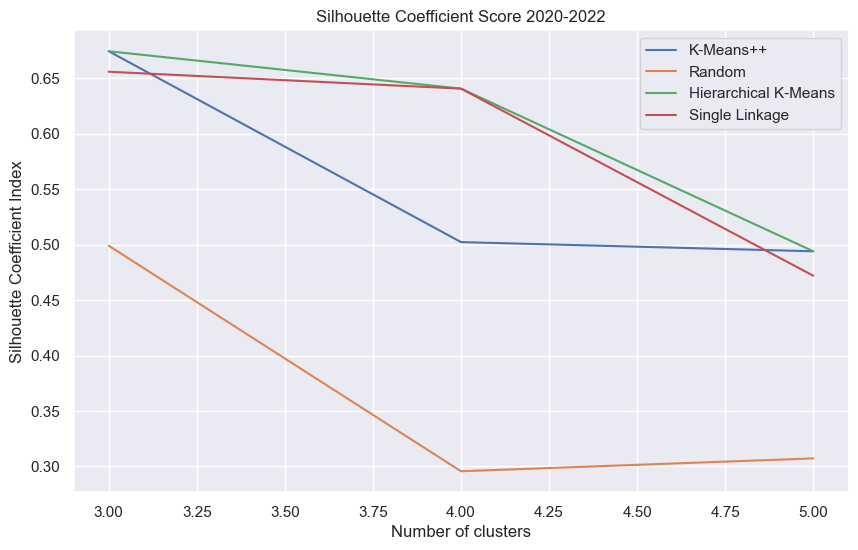

In [ ]:
sns.set(rc={"figure.figsize":(10, 6)})
plt.plot(list(resultsk.keys()), list(resultsk.values()), label='K-Means++')
plt.plot(list(resultsr.keys()), list(resultsr.values()), label='Random')
plt.plot(list(resultshk.keys()), list(resultshk.values()), label='Hierarchical K-Means')
plt.plot(list(resultssl.keys()), list(resultssl.values()), label='Single Linkage')
plt.title('Silhouette Coefficient Score 2020-2022')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient Index")
plt.legend()
plt.show()

In [ ]:
score3_i = silhouette_score(psc, Kmeans_Tabel['k=3 kmeans++'], metric='euclidean')
score4_i = silhouette_score(psc, Kmeans_Tabel['k=4 kmeans++'], metric='euclidean')
score5_i = silhouette_score(psc, Kmeans_Tabel['k=5 kmeans++'], metric='euclidean')
score3_r = silhouette_score(psc, Kmeans_Tabel['k=3 random'], metric='euclidean')
score4_r = silhouette_score(psc, Kmeans_Tabel['k=4 random'], metric='euclidean')
score5_r = silhouette_score(psc, Kmeans_Tabel['k=5 random'], metric='euclidean')
hscore3 = silhouette_score(psc, identified_clusters_hKmeans3, metric='euclidean')
hscore4 = silhouette_score(psc, identified_clusters_hKmeans4, metric='euclidean')
hscore5 = silhouette_score(psc, identified_clusters_hKmeans5, metric='euclidean')

In [ ]:
print('Silhouette coefficient K-means 3 k-means++:',score3_i)
print('Silhouette coefficient K-means 4 k-means++:',score4_i)
print('Silhouette coefficient K-means 5 k-means++:',score5_i)
print('Silhouette coefficient K-means 3 random:',score3_r)
print('Silhouette coefficient K-means 4 random:',score4_r)
print('Silhouette coefficient K-means 5 random:',score5_r)
print('Silhouette coefficient HK-means 3:',hscore3)
print('Silhouette coefficient HK-means 4:',hscore4)
print('Silhouette coefficient HK-means 5:',hscore5)

Silhouette coefficient K-means 3 k-means++: 0.6745383942607401
Silhouette coefficient K-means 4 k-means++: 0.5024000913928874
Silhouette coefficient K-means 5 k-means++: 0.4941079464595051
Silhouette coefficient K-means 3 random: 0.4991462727828761
Silhouette coefficient K-means 4 random: 0.2957044656981662
Silhouette coefficient K-means 5 random: 0.3073022491918449
Silhouette coefficient HK-means 3: 0.6745383942607401
Silhouette coefficient HK-means 4: 0.6408219489733553
Silhouette coefficient HK-means 5: 0.4941079464595051


In [ ]:
scores3 = silhouette_score(psc, cluster3, metric='euclidean')
scores4 = silhouette_score(psc, cluster4, metric='euclidean')
scores5 = silhouette_score(psc, cluster5, metric='euclidean')

In [ ]:
print('Silhouette coefficient K-means 3:',scores3)
print('Silhouette coefficient K-means 4:',scores4)
print('Silhouette coefficient K-means 5:',scores5)

Silhouette coefficient K-means 3: 0.6560560906881828
Silhouette coefficient K-means 4: 0.6408219489733553
Silhouette coefficient K-means 5: 0.47206141916418703


## Original Data

# 6. Evaluasi cluster

## 6.1 Calinski Harabasz Index

In [ ]:
ch_index_kmeans3_i = calinski_harabasz_score(pb, Kmeans_Tabel['k=3 kmeans++'])
ch_index_kmeans4_i = calinski_harabasz_score(pb, Kmeans_Tabel['k=4 kmeans++'])
ch_index_kmeans5_i = calinski_harabasz_score(pb, Kmeans_Tabel['k=5 kmeans++'])
ch_index_kmeans3_r = calinski_harabasz_score(pb, Kmeans_Tabel['k=3 random'])
ch_index_kmeans4_r = calinski_harabasz_score(pb, Kmeans_Tabel['k=4 random'])
ch_index_kmeans5_r = calinski_harabasz_score(pb, Kmeans_Tabel['k=5 random'])
ch_index_hkmeans3 = calinski_harabasz_score(pb, Hierarchical_Kmeans_Tabel['k=3 hk'])
ch_index_hkmeans4 = calinski_harabasz_score(pb, Hierarchical_Kmeans_Tabel['k=4 hk'])
ch_index_hkmeans5 = calinski_harabasz_score(pb, Hierarchical_Kmeans_Tabel['k=5 hk'])

In [ ]:
print('Calinski Harabasz Index K-means 3 kmeans++:',ch_index_kmeans3_i)
print('Calinski Harabasz Index K-means 4 kmeans++:',ch_index_kmeans4_i)
print('Calinski Harabasz Index K-means 5 kmeans++:',ch_index_kmeans5_i)
print('Calinski Harabasz Index K-means 3 random:',ch_index_kmeans3_r)
print('Calinski Harabasz Index K-means 3 random:',ch_index_kmeans4_r)
print('Calinski Harabasz Index K-means 3 random:',ch_index_kmeans5_r)
print('Calinski Harabasz Index HK-means 3:',ch_index_hkmeans3)
print('Calinski Harabasz Index HK-means 4:',ch_index_hkmeans4)
print('Calinski Harabasz Index HK-means 5:',ch_index_hkmeans5)

Calinski Harabasz Index K-means 3 kmeans++: 57.982645118375565
Calinski Harabasz Index K-means 4 kmeans++: 49.69512635670209
Calinski Harabasz Index K-means 5 kmeans++: 41.93869884583579
Calinski Harabasz Index K-means 3 random: 29.186360201480685
Calinski Harabasz Index K-means 3 random: 16.58936536079578
Calinski Harabasz Index K-means 3 random: 39.53415387813175
Calinski Harabasz Index HK-means 3: 57.98264511837555
Calinski Harabasz Index HK-means 4: 42.40873814090654
Calinski Harabasz Index HK-means 5: 41.93869884583579


In [ ]:
ch_index_SingleLinkage3 = calinski_harabasz_score(psc, cluster3 )
ch_index_SingleLinkage4 = calinski_harabasz_score(psc, cluster4 )
ch_index_SingleLinkage5 = calinski_harabasz_score(psc, cluster5 )

In [ ]:
print('Calinski Harabasz Index Single Linkage 3:',ch_index_SingleLinkage3)
print('Calinski Harabasz Index Single Linkage 4:',ch_index_SingleLinkage4)
print('Calinski Harabasz Index Single Linkage 5:',ch_index_SingleLinkage5)

Calinski Harabasz Index Single Linkage 3: 20.493703416896846
Calinski Harabasz Index Single Linkage 4: 24.59244988312941
Calinski Harabasz Index Single Linkage 5: 22.101845709584115


## 6.2 Silhouette coefficient

In [ ]:
score3_i = silhouette_score(pb, Kmeans_Tabel['k=3 kmeans++'], metric='euclidean')
score4_i = silhouette_score(pb, Kmeans_Tabel['k=4 kmeans++'], metric='euclidean')
score5_i = silhouette_score(pb, Kmeans_Tabel['k=5 kmeans++'], metric='euclidean')
score3_r = silhouette_score(pb, Kmeans_Tabel['k=3 random'], metric='euclidean')
score4_r = silhouette_score(pb, Kmeans_Tabel['k=4 random'], metric='euclidean')
score5_r = silhouette_score(pb, Kmeans_Tabel['k=5 random'], metric='euclidean')
hscore3 = silhouette_score(pb, identified_clusters_hKmeans3, metric='euclidean')
hscore4 = silhouette_score(pb, identified_clusters_hKmeans4, metric='euclidean')
hscore5 = silhouette_score(pb, identified_clusters_hKmeans5, metric='euclidean')

In [ ]:
print('Silhouette coefficient K-means 3 k-means++:',score3_i)
print('Silhouette coefficient K-means 4 k-means++:',score4_i)
print('Silhouette coefficient K-means 5 k-means++:',score5_i)
print('Silhouette coefficient K-means 3 random:',score3_r)
print('Silhouette coefficient K-means 4 random:',score4_r)
print('Silhouette coefficient K-means 5 random:',score5_r)
print('Silhouette coefficient HK-means 3:',hscore3)
print('Silhouette coefficient HK-means 4:',hscore4)
print('Silhouette coefficient HK-means 5:',hscore5)

Silhouette coefficient K-means 3 k-means++: 0.726621062844469
Silhouette coefficient K-means 4 k-means++: 0.5201142248204489
Silhouette coefficient K-means 5 k-means++: 0.4986093315415186
Silhouette coefficient K-means 3 random: 0.5105054377850797
Silhouette coefficient K-means 4 random: 0.23293788852406308
Silhouette coefficient K-means 5 random: 0.25895015082520845
Silhouette coefficient HK-means 3: 0.726621062844469
Silhouette coefficient HK-means 4: 0.6751365567576909
Silhouette coefficient HK-means 5: 0.4986093315415186


In [ ]:
scores3 = silhouette_score(pb, cluster3, metric='euclidean')
scores4 = silhouette_score(pb, cluster4, metric='euclidean')
scores5 = silhouette_score(pb, cluster5, metric='euclidean')

In [ ]:
print('Silhouette coefficient K-means 3:',scores3)
print('Silhouette coefficient K-means 4:',scores4)
print('Silhouette coefficient K-means 5:',scores5)

Silhouette coefficient K-means 3: 0.6340872807029864
Silhouette coefficient K-means 4: 0.6751365567576909
Silhouette coefficient K-means 5: 0.12120922846162763


## 6.3 Visualisasi

In [ ]:
class Radar(object):
    def __init__(self, figure, title, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.9, 0.9]

        self.n = len(title)
        self.angles = np.arange(0, 360, 360.0/self.n)

        self.axes = [figure.add_axes(rect, projection='polar', label='axes%d' % i) for i in range(self.n)]
        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=title, fontsize=14, backgroundcolor="white",zorder=999) # Feature names
        self.ax.set_yticklabels([])

        for ax in self.axes[1:]:
            ax.xaxis.set_visible(False)
            ax.set_yticklabels([])
            ax.set_zorder(-99)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.spines['polar'].set_color('black')
            ax.spines['polar'].set_zorder(-99)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)
        kw['label'] = '_noLabel'
        self.ax.fill(angle, values,*args,**kw)

In [ ]:
# Let's define max. 6 different cluster colors - if you like you can add here more.
cluster_colors = ['#b4d2b1', '#568f8b', '#1d4a60', '#cd7e59', '#ddb247', '#d15252']

### 6.3.1 K-Means++

In [ ]:
X_mean3_i = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=3 kmeans++').mean().T], axis=1)
X_dev_rel3_i = X_mean3_i.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel3_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean3_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean3_i = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=3 kmeans++').mean().T], axis=1)

X_std_dev_rel3_i = X_std_mean3_i.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel3_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean3_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

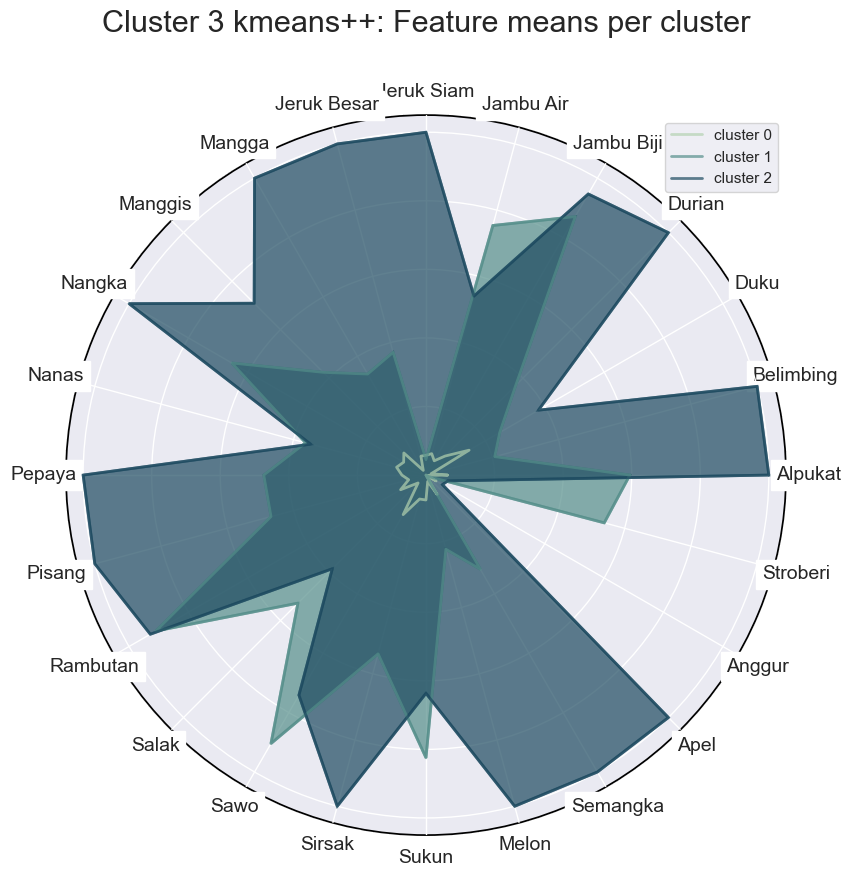

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans3.feature_names_in_)
radar = Radar(fig, kmeans3.feature_names_in_, np.unique(kmeans3.labels_))

for k in range(0,kmeans3.n_clusters):
    cluster_data = X_std_mean3_i[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 3 kmeans++: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean4_i = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=4 kmeans++').mean().T], axis=1)
X_dev_rel4_i = X_mean4_i.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel4_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean4_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean4_i = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=4 kmeans++').mean().T], axis=1)

X_std_dev_rel4_i = X_std_mean4_i.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel4_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean4_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

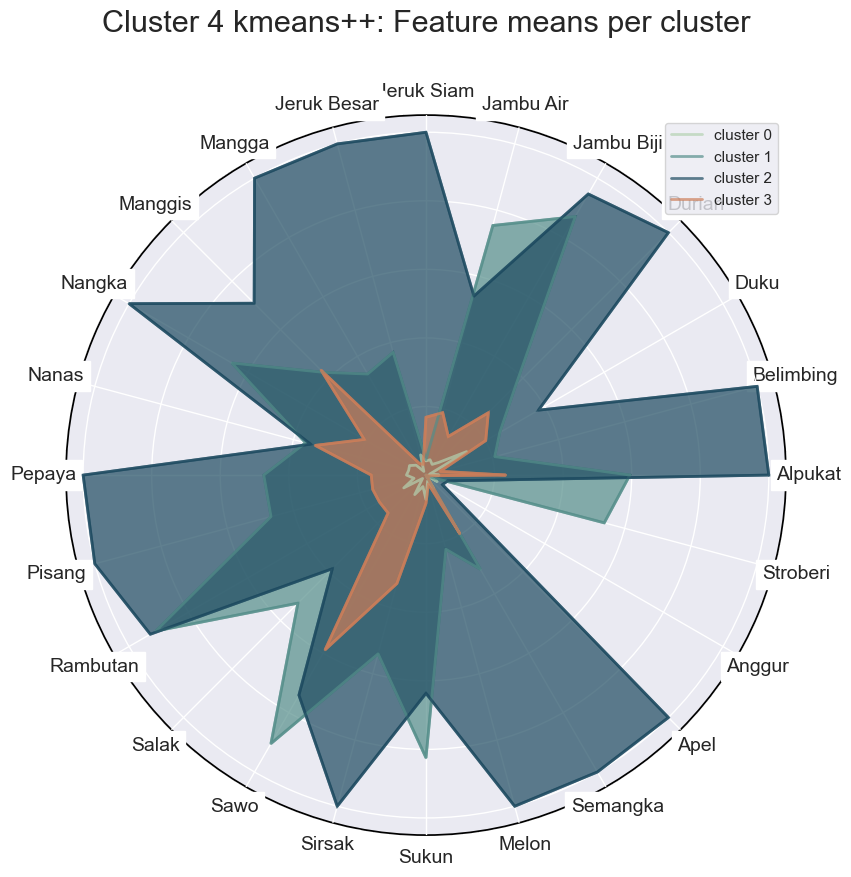

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans4.feature_names_in_)
radar = Radar(fig, kmeans4.feature_names_in_, np.unique(kmeans3.labels_))

for k in range(0,kmeans4.n_clusters):
    cluster_data = X_std_mean4_i[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 4 kmeans++: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean5_i = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=5 kmeans++').mean().T], axis=1)
X_dev_rel5_i = X_mean5_i.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel5_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean5_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean5_i = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=5 kmeans++').mean().T], axis=1)

X_std_dev_rel5_i = X_std_mean5_i.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel5_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean5_i.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

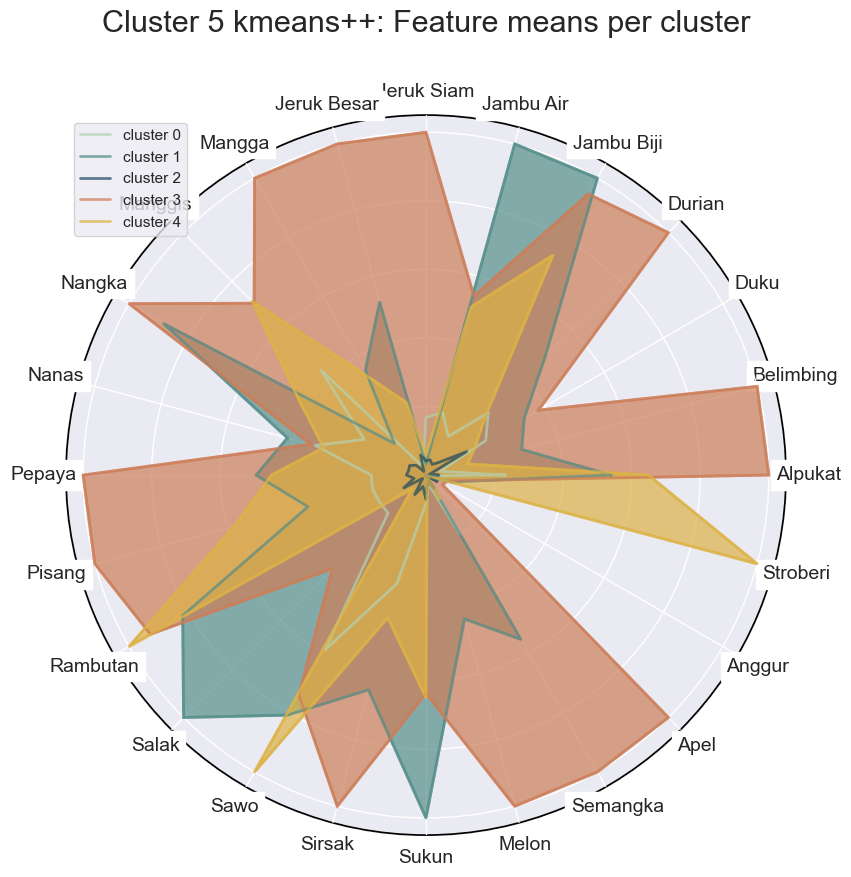

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans5.feature_names_in_)
radar = Radar(fig, kmeans5.feature_names_in_, np.unique(kmeans5.labels_))

for k in range(0,kmeans5.n_clusters):
    cluster_data = X_std_mean5_i[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 5 kmeans++: Feature means per cluster", size=22, pad=60)
plt.show()

### 6.3.2 Random

In [ ]:
X_mean3_r = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=3 random').mean().T], axis=1)
X_dev_rel3_r = X_mean3_r.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel3_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean3_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean3_r = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=3 random').mean().T], axis=1)

X_std_dev_rel3_r = X_std_mean3_r.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel3_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean3_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

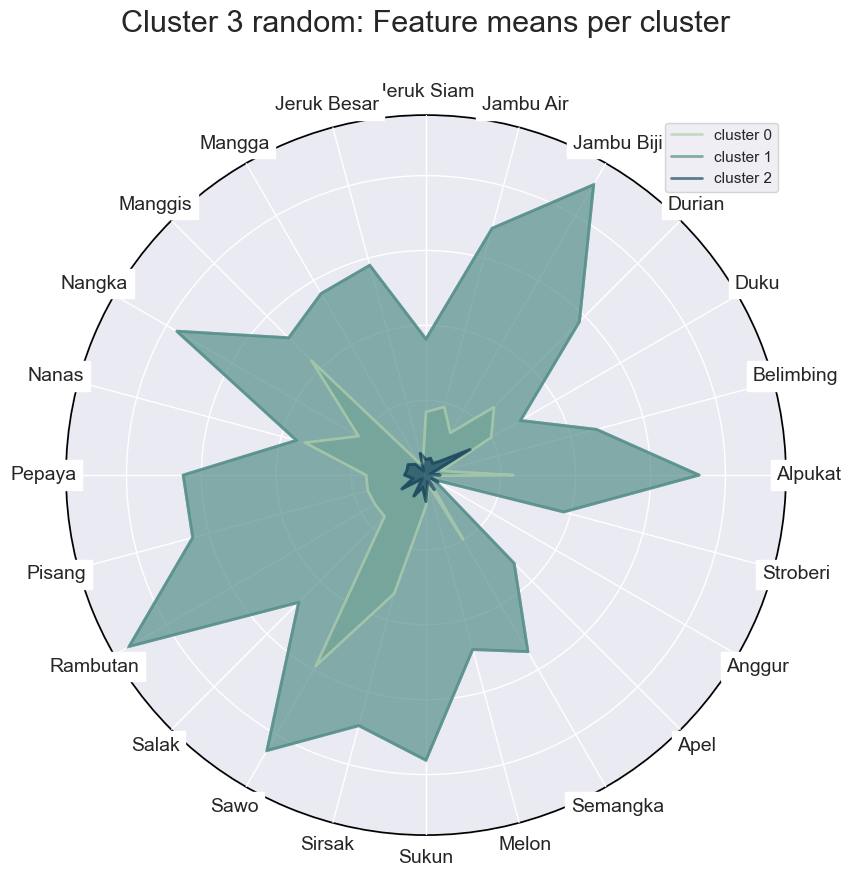

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans3.feature_names_in_)
radar = Radar(fig, kmeans3.feature_names_in_, np.unique(kmeans3.labels_))

for k in range(0,kmeans3.n_clusters):
    cluster_data = X_std_mean3_r[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 3 random: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean4_r = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=4 random').mean().T], axis=1)
X_dev_rel4_r = X_mean4_r.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel4_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean4_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean4_r = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=4 random').mean().T], axis=1)

X_std_dev_rel4_r = X_std_mean4_r.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel4_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean4_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

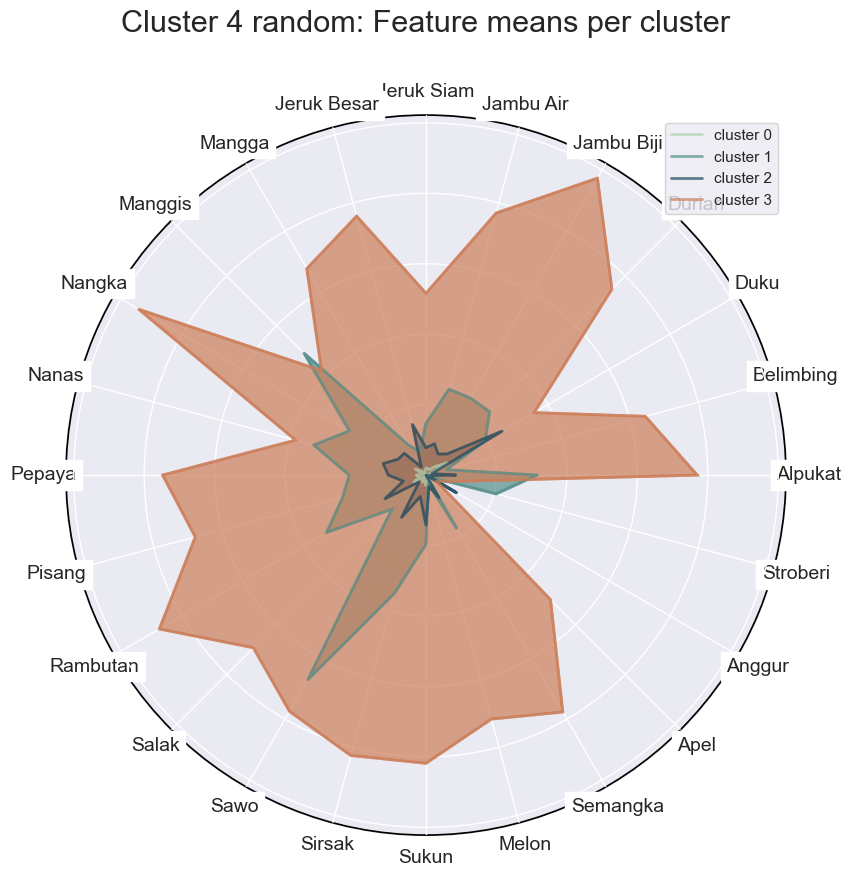

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans4.feature_names_in_)
radar = Radar(fig, kmeans4.feature_names_in_, np.unique(kmeans4.labels_))

for k in range(0,kmeans4.n_clusters):
    cluster_data = X_std_mean4_r[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 4 random: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean5_r = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=5 random').mean().T], axis=1)
X_dev_rel5_r = X_mean5_r.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel5_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean5_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean5_r = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=5 random').mean().T], axis=1)

X_std_dev_rel5_r = X_std_mean5_r.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel5_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean5_r.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

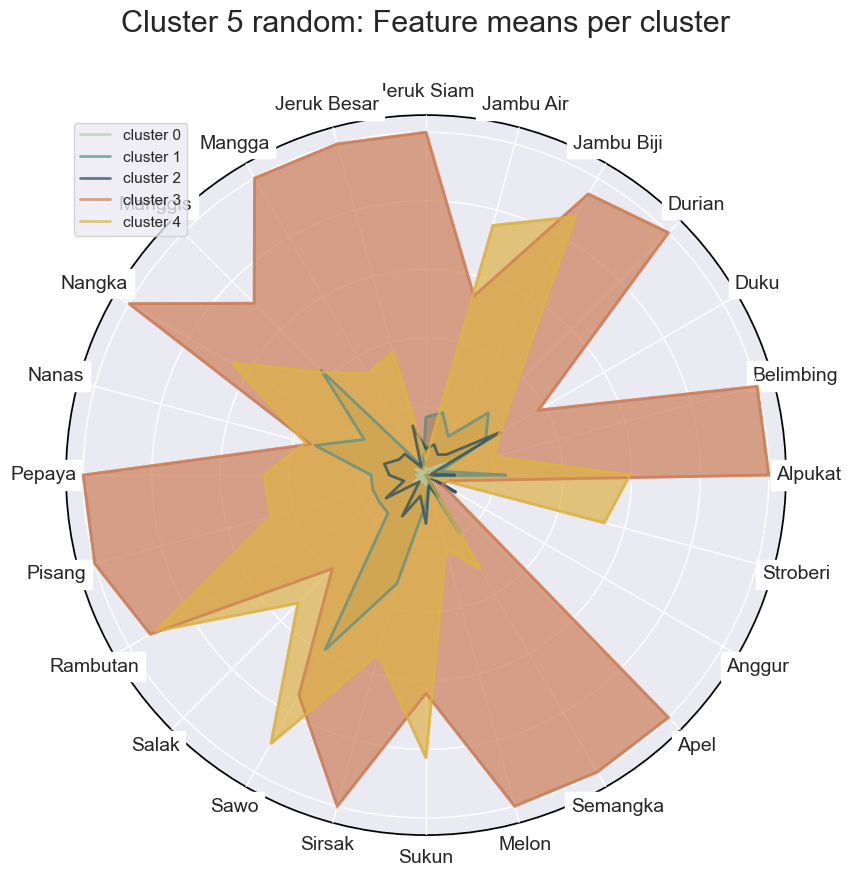

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans5.feature_names_in_)
radar = Radar(fig, kmeans5.feature_names_in_, np.unique(kmeans5.labels_))

for k in range(0,kmeans5.n_clusters):
    cluster_data = X_std_mean5_r[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 5 random: Feature means per cluster", size=22, pad=60)
plt.show()

### 6.3.3 Hierarchical KMeans Clustering

In [ ]:
X_mean3_hk = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=3 hk').mean().T], axis=1)
X_dev_rel3_hk = X_mean3_hk.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel3_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean3_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean3_hk = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=3 hk').mean().T], axis=1)

X_std_dev_rel3_hk = X_std_mean3_hk.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel3_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean3_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

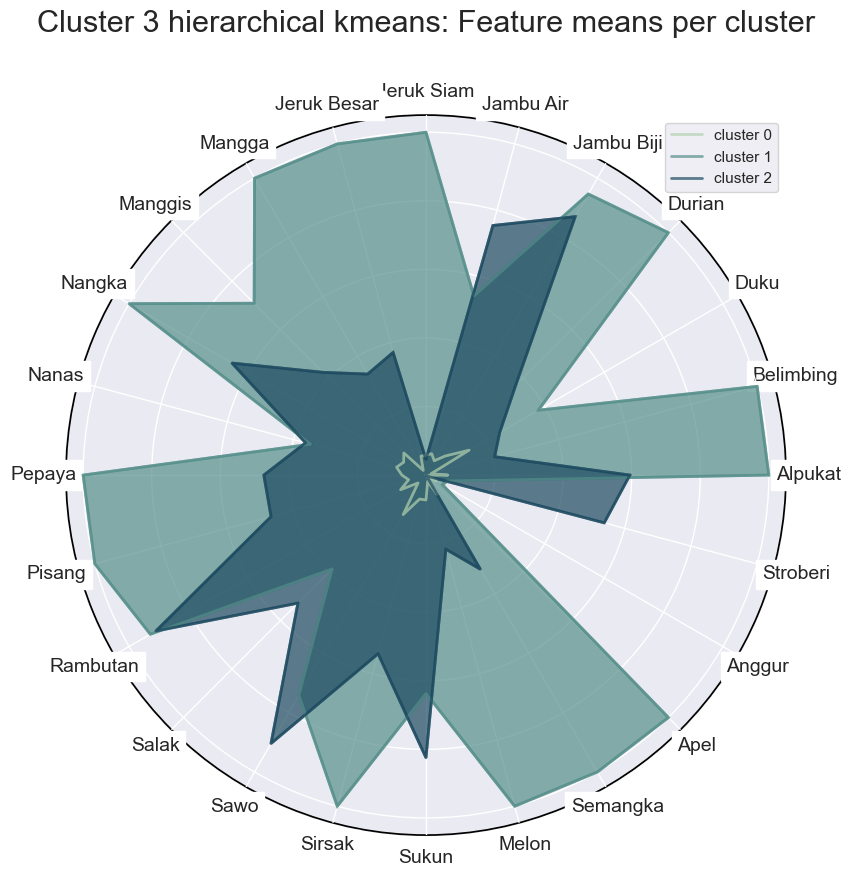

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans3.feature_names_in_)
radar = Radar(fig, kmeans3.feature_names_in_, np.unique(kmeans3.labels_))

for k in range(0,kmeans3.n_clusters):
    cluster_data = X_std_mean3_hk[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 3 hierarchical kmeans: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean4_hk = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=4 hk').mean().T], axis=1)
X_dev_rel4_hk = X_mean4_hk.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel4_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean4_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean4_hk = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=4 hk').mean().T], axis=1)

X_std_dev_rel4_hk = X_std_mean4_hk.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel4_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean4_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

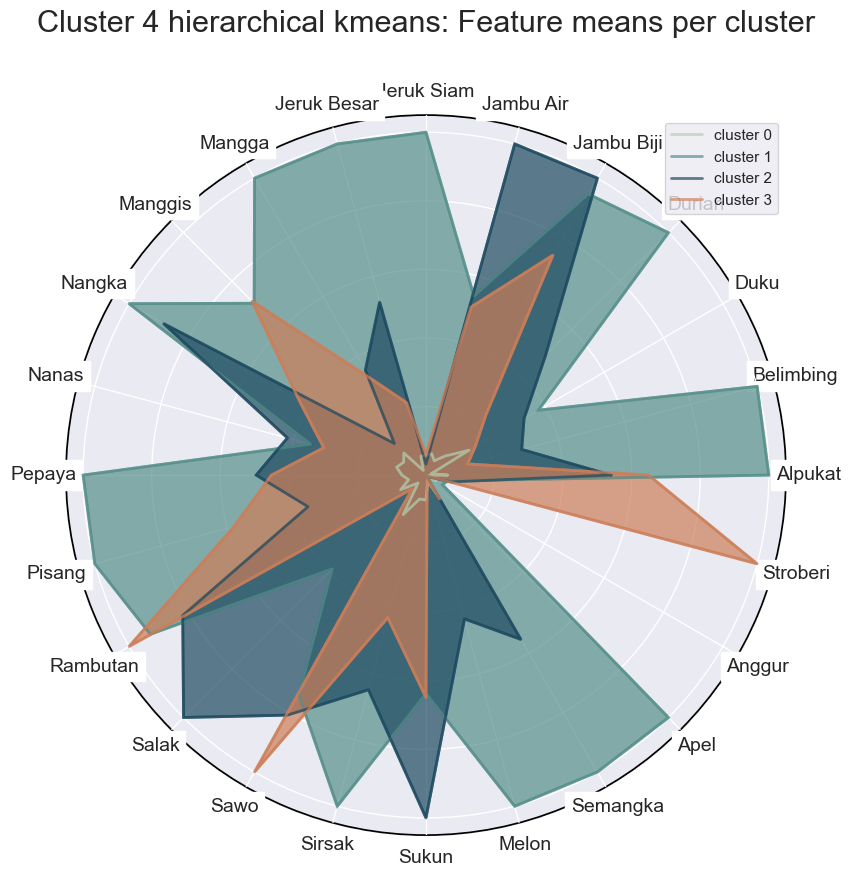

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans4.feature_names_in_)
radar = Radar(fig, kmeans4.feature_names_in_, np.unique(kmeans4.labels_))

for k in range(0,kmeans4.n_clusters):
    cluster_data = X_std_mean4_hk[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 4 hierarchical kmeans: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean5_hk = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=5 hk').mean().T], axis=1)
X_dev_rel5_hk = X_mean5_hk.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel5_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean5_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean5_hk = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=5 hk').mean().T], axis=1)

X_std_dev_rel5_hk = X_std_mean5_hk.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel5_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean5_hk.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

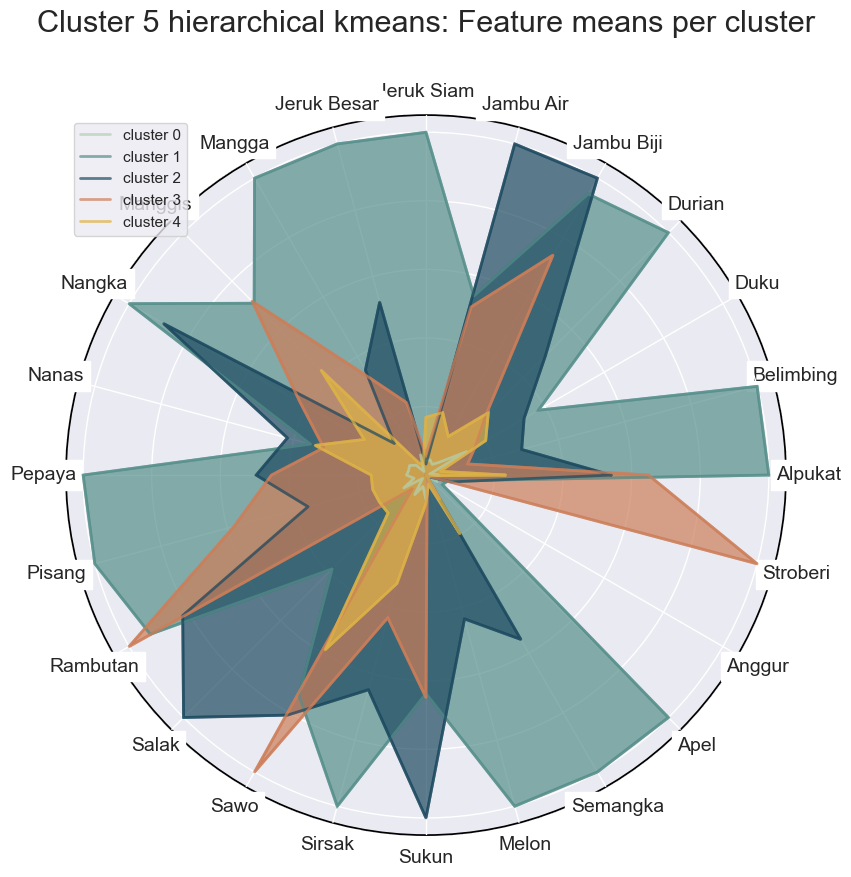

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans5.feature_names_in_)
radar = Radar(fig, kmeans5.feature_names_in_, np.unique(kmeans5.labels_))

for k in range(0,kmeans5.n_clusters):
    cluster_data = X_std_mean5_hk[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 5 hierarchical kmeans: Feature means per cluster", size=22, pad=60)
plt.show()

### 6.3.4 Single Linkage

In [ ]:
X_mean3_sl = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=3').mean().T], axis=1)
X_dev_rel3_sl = X_mean3_sl.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel3_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean3_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean3_sl = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=3').mean().T], axis=1)

X_std_dev_rel3_sl = X_std_mean3_sl.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel3_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean3_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

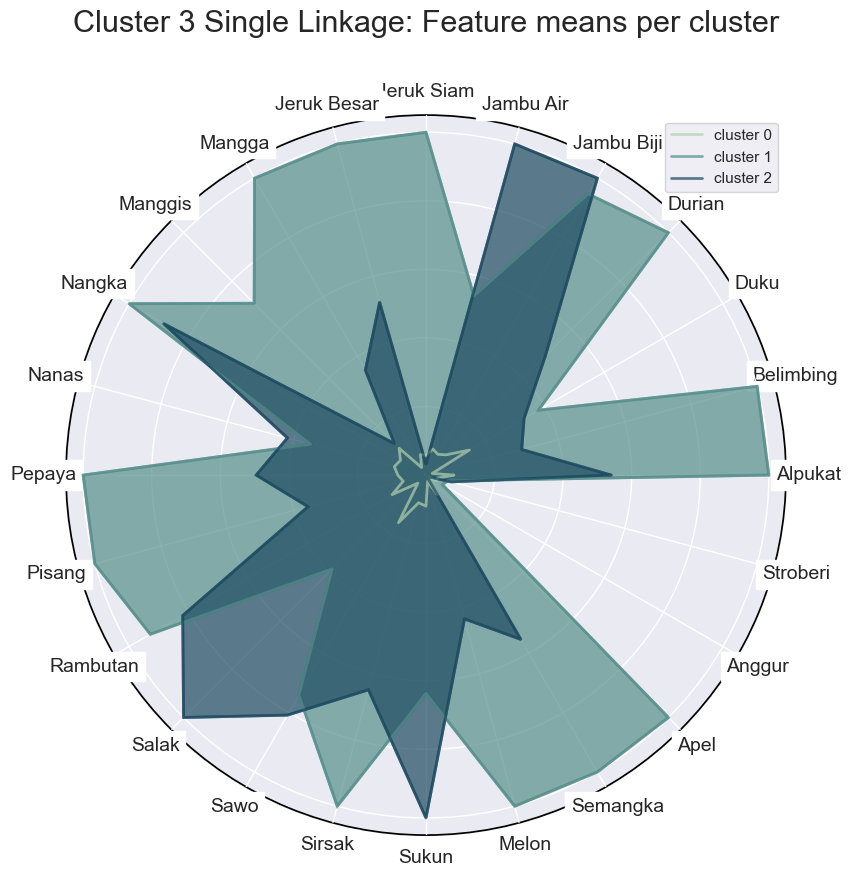

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans3.feature_names_in_)
radar = Radar(fig, kmeans3.feature_names_in_, np.unique(kmeans3.labels_))

for k in range(0,kmeans3.n_clusters):
    cluster_data = X_std_mean3_sl[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 3 Single Linkage: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean4_sl = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=4').mean().T], axis=1)
X_dev_rel4_sl = X_mean4_sl.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel4_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean4_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean4_sl = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=4').mean().T], axis=1)

X_std_dev_rel4_sl = X_std_mean4_sl.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel4_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean4_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

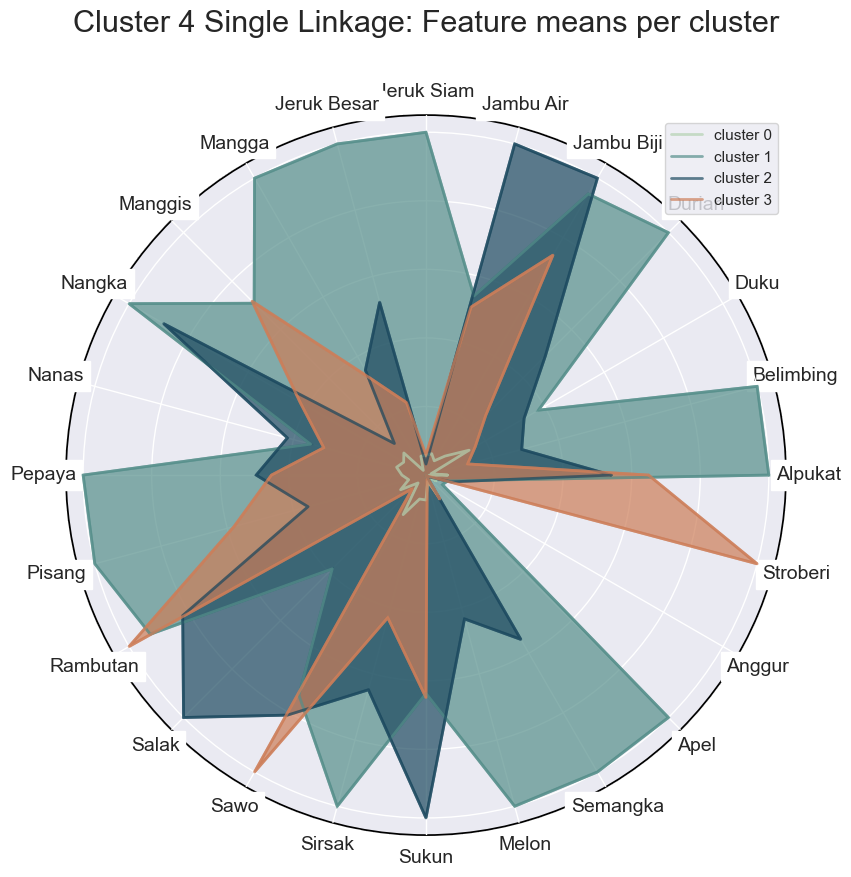

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans4.feature_names_in_)
radar = Radar(fig, kmeans4.feature_names_in_, np.unique(kmeans4.labels_))

for k in range(0,kmeans4.n_clusters):
    cluster_data = X_std_mean4_sl[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 4 Single Linkage: Feature means per cluster", size=22, pad=60)
plt.show()

In [ ]:
X_mean5_sl = pd.concat([pd.DataFrame(ProduksiBuah20_22_copy.mean(), columns=['mean']),
                   ProduksiBuah20_22_copy.groupby('k=5').mean().T], axis=1)
X_dev_rel5_sl = X_mean5_sl.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_dev_rel5_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_mean5_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

X_std_mean5_sl = pd.concat([pd.DataFrame(ProduksiBuah20_22_scaled_cluster.mean(), columns=['mean']),
                   ProduksiBuah20_22_scaled_cluster.groupby('k=5').mean().T], axis=1)

X_std_dev_rel5_sl = X_std_mean5_sl.apply(lambda x: round((x-x['mean'])/x['mean'],2)*100, axis = 1)
X_std_dev_rel5_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)
X_std_mean5_sl.drop(columns=['mean'],index=['k=3 kmeans++','k=4 kmeans++','k=5 kmeans++','k=3 random','k=4 random','k=5 random','k=3','k=4','k=5','k=3 hk','k=4 hk','k=5 hk'], inplace=True)

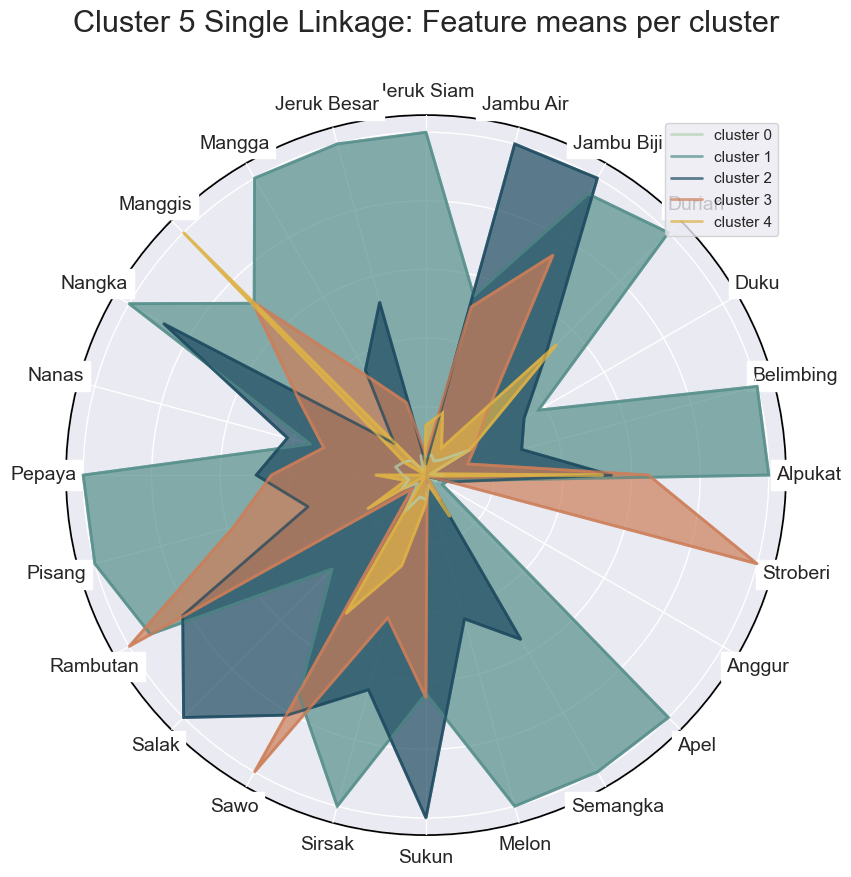

In [ ]:
fig = plt.figure(figsize=(8, 8))
no_features = len(kmeans5.feature_names_in_)
radar = Radar(fig, kmeans5.feature_names_in_, np.unique(kmeans5.labels_))

for k in range(0,kmeans5.n_clusters):
    cluster_data = X_std_mean5_sl[k].values.tolist()
    radar.plot(cluster_data, '-', lw=2, color=cluster_colors[k], alpha=0.7, label='cluster {}'.format(k))

radar.ax.legend()
radar.ax.set_title("Cluster 5 Single Linkage: Feature means per cluster", size=22, pad=60)
plt.show()